In [1]:

import numpy as np
import pandas as pd
# %matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats
plt.rcParams["figure.dpi"] = 300
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

In [10]:
A = np.random.randn(4,3)
B = np.sum(A, axis = 1, keepdims = False)  # axix = 1 means row-wise summation
print(B)
print('.........................')
print(A)

[ 2.53692961 -0.95154625  0.13204206 -2.38174422]
.........................
[[-0.11195654  0.02039957  2.62848659]
 [ 1.04981052 -1.00994689 -0.99140988]
 [ 0.0073234  -0.73567882  0.86039748]
 [-0.8961034  -0.94532011 -0.54032071]]


<b> let's start with Health Risk Part of my Article:</b>

- Average Daily Dose ADD = (C×IR×ED×EF)/BW×AT 
- Hazard Quotient HQ = ADD / RfD
- Hazard Index HI = HQAs + HQMn + HQFe
- Carcinogenic Risk CR = ADD × CSF × ADAF 

# General Rule of Hazard Quotient for Age group 6-15

In [25]:
def for_non(C,IR):
    ED=10
    EF=365
    BW=27.5
    AT=ED*365
    ADD=C*IR*ED*EF/(BW*AT)
    return ADD
ADD=(for_non(50,2))
print('ADD:',ADD)
RF=.14
HQ = ADD*RF
print('HQ:',HQ)

ADD: 3.6363636363636362
HQ: 0.5090909090909091


# General Rule of Carcinogenic Risk

In [26]:
def for_non(C,IR):
    ED=5
    EF=365
    BW=14.5
    AT=70*365
    ADD=C*IR*ED*EF/(BW*AT)
    return ADD
ADD=(for_non(4/1000,1))
# print('ADD:',ADD)
CSF=1.5
CR = ADD * CSF *4.5
print('CR:',CR) 

CR: 0.00013300492610837438


In [14]:
df = pd.read_excel('arsenic hazard2.xlsx')
df.head(15)

Unnamed: 0.1  Unnamed: 0                UNION  AsIII  HQ_for_all
0              0           0  Faridpur Paurashava      7    0.144828
1              1           1  Faridpur Paurashava    990   20.482759
2              2           2  Faridpur Paurashava      4    0.082759
3              3           3  Faridpur Paurashava      4    0.082759
4              4           4  Faridpur Paurashava      4    0.082759
5              5           5  Faridpur Paurashava      6    0.124138
6              6           6  Faridpur Paurashava     74    1.531034
7              7           7  Faridpur Paurashava      4    0.082759
8              8           9            Ambikapur     27    0.558621
9              9          10            Ambikapur     17    0.351724
10            10          11            Ambikapur      4    0.082759
11            11          13              Kaijuri     39    0.806897
12            12          14              Kaijuri      4    0.082759
13            13          15              Kaijuri      4    0.082759
14            14          16              Kaijuri     42    0.868966

In [13]:

df.dropna(inplace =True)
len(df)


64

In [15]:
def for_non(C,IR):
    
    ED=5
    EF=365
    BW=14.5
    AT=ED*365
    ADD=C*IR*ED*EF/(BW*AT)
    return ADD
ADD=(for_non(df.AsIII,1))
print('ADD:',ADD)
RF=.3
HQ = ADD*RF
print('HQ:',HQ) 

ADD: 0      0.482759
1     68.275862
2      0.275862
3      0.275862
4      0.275862
        ...    
59     0.275862
60     1.172414
61     0.275862
62     6.344828
63     6.206897
Name: AsIII, Length: 64, dtype: float64
HQ: 0      0.144828
1     20.482759
2      0.082759
3      0.082759
4      0.082759
        ...    
59     0.082759
60     0.351724
61     0.082759
62     1.903448
63     1.862069
Name: AsIII, Length: 64, dtype: float64


In [16]:
m= pd.DataFrame({"HQ":HQ, "union":df.UNION})
print(m.head(5))


          HQ                union
0   0.144828  Faridpur Paurashava
1  20.482759  Faridpur Paurashava
2   0.082759  Faridpur Paurashava
3   0.082759  Faridpur Paurashava
4   0.082759  Faridpur Paurashava


In [17]:
df['HQ_for_0-5']=HQ
df['ADD_for0-5']=ADD
df.drop(['Unnamed: 0','Unnamed: 0.1','HQ_for_all'],axis =1,inplace = True)

In [18]:
df

UNION  AsIII  HQ_for_0-5  ADD_for0-5
0   Faridpur Paurashava      7    0.144828    0.482759
1   Faridpur Paurashava    990   20.482759   68.275862
2   Faridpur Paurashava      4    0.082759    0.275862
3   Faridpur Paurashava      4    0.082759    0.275862
4   Faridpur Paurashava      4    0.082759    0.275862
..                  ...    ...         ...         ...
59              Aliabad      4    0.082759    0.275862
60              Aliabad     17    0.351724    1.172414
61              Aliabad      4    0.082759    0.275862
62              Aliabad     92    1.903448    6.344828
63              Aliabad     90    1.862069    6.206897

[64 rows x 4 columns]

# HQ for 6-15

In [18]:
def for_non(C,IR):
    ED=10
    EF=365
    BW=27.5
    AT=ED*365
    ADD=C*IR*ED*EF/(BW*AT)
    return ADD
ADD=(for_non(50,2))
print('ADD:',ADD)
RF=.14
HQ = ADD*RF
print('HQ:',HQ)

ADD: 3.6363636363636362
HQ: 0.5090909090909091


In [19]:
# df['HQ_for_6-15']=HQ
# df['ADD_for6-15']=ADD
# df

# HQ for Manganses

In [19]:
df = pd.read_excel("arsenic hazard totaaaal.xlsx",'HQ for Mn')
df.head(5)

LAT_DEG  LONG_DEG                UNION     Mn     Fe  AsIII
0  23.6147   89.8553  Faridpur Paurashava  1.470  0.447      7
1  23.6075   89.8633  Faridpur Paurashava  1.130  4.240    990
2  23.6031   89.8272            Ambikapur  1.130  9.600     27
3  23.6064   89.8444  Faridpur Paurashava  0.999  0.944      4
4  23.5689   89.8536              Aliabad  0.080  7.680      4

In [8]:
df.Class.replace('Forest','Vegetation',inplace = True)
df

Year              Class  Area(sq. km)  Area in Percentage
0   2020      Built-up area       15.1731           55.886188
1   2020  Agricultural land        3.5397           13.037569
2   2020         Vegetation        5.1480           18.961326
3   2020          Bare soil        1.0647            3.921547
4   2020              Water        2.2545            8.303867
5   2000      Built-up area       10.3100           37.974217
6   2000         Vegetation        5.0000           18.416206
7   2000  Agricultural land        7.0000           25.782689
8   2000          Bare soil        1.8000            6.629834
9   2000              Water        3.0000           11.049724
10  1990         Vegetation        2.8701           10.571271
11  1990  Agricultural land       12.9681           47.764641
12  1990      Built-up area        4.0221           14.814365
13  1990          Bare soil        3.0800           11.344383
14  1990              Water        4.3145           15.891344

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LAT_DEG   64 non-null     float64
 1   LONG_DEG  64 non-null     float64
 2   UNION     64 non-null     object 
 3   Mn        64 non-null     float64
 4   Fe        64 non-null     float64
 5   AsIII     64 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.1+ KB


In [20]:
numeric_feats = df.dtypes[df.dtypes != "object"].index
numeric_feats


Index(['LAT_DEG', 'LONG_DEG', 'Mn', 'Fe', 'AsIII'], dtype='object')

In [29]:
from scipy.stats import norm, skew
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features:\n",skewed_feats)
# skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.head(10)


Skew in numerical features:
 AsIII       6.406458
Mn          2.465848
Fe          0.891294
LAT_DEG     0.197031
LONG_DEG   -0.443141
dtype: float64


In [76]:
# df['c2'] = df['UNION'].apply(lambda x: 10 if x == 'Faridpur Paurashava' else x)
df['c3'] = df['UNION'].apply( mun)
df

LAT_DEG  LONG_DEG                UNION     Mn      Fe  AsIII      c3
0   23.6147   89.8553  Faridpur Paurashava  1.470   0.447      7    high
1   23.6075   89.8633  Faridpur Paurashava  1.130   4.240    990    high
2   23.6031   89.8272            Ambikapur  1.130   9.600     27     low
3   23.6064   89.8444  Faridpur Paurashava  0.999   0.944      4    high
4   23.5689   89.8536              Aliabad  0.080   7.680      4  medium
..      ...       ...                  ...    ...     ...    ...     ...
59  23.5789   89.8411              Kaijuri  0.246  18.400     16  medium
60  23.6339   89.7581              Majchar  0.822   0.879      4  medium
61  23.5897   89.8128  Faridpur Paurashava  0.078   8.270     74    high
62  23.6033   89.8408  Faridpur Paurashava  0.581   3.530      4    high
63  23.5919   89.8417              Aliabad  0.136   6.270     90  medium

[64 rows x 7 columns]

# now final non carcinogenic

In [107]:
def for_non(C,IR):
    ED=50
    EF=365
    BW=70
    AT=ED*365
    ADD=C*IR*ED*EF/(BW*AT)
    return ADD
ADD=(for_non(df.AsIII,2))
print('ADD:',ADD)
RF=.3
HQ = ADD*RF
print('HQ:',HQ)

ADD: 0      0.200000
1     28.285714
2      0.114286
3      0.114286
4      0.114286
        ...    
59     0.114286
60     0.485714
61     0.114286
62     2.628571
63     2.571429
Name: AsIII, Length: 64, dtype: float64
HQ: 0     0.060000
1     8.485714
2     0.034286
3     0.034286
4     0.034286
        ...   
59    0.034286
60    0.145714
61    0.034286
62    0.788571
63    0.771429
Name: AsIII, Length: 64, dtype: float64


In [108]:
df['HQ_for >15']=HQ
df['ADD_for >15']=ADD
df

UNION  AsIII  HQ_for_0-5  ADD_for0-5  HQ_for_6-15  \
0   Faridpur Paurashava      7    0.144828    0.482759     0.152727   
1   Faridpur Paurashava    990   20.482759   68.275862    21.600000   
2   Faridpur Paurashava      4    0.082759    0.275862     0.087273   
3   Faridpur Paurashava      4    0.082759    0.275862     0.087273   
4   Faridpur Paurashava      4    0.082759    0.275862     0.087273   
..                  ...    ...         ...         ...          ...   
59              Aliabad      4    0.082759    0.275862     0.087273   
60              Aliabad     17    0.351724    1.172414     0.370909   
61              Aliabad      4    0.082759    0.275862     0.087273   
62              Aliabad     92    1.903448    6.344828     2.007273   
63              Aliabad     90    1.862069    6.206897     1.963636   

    ADD_for6-15  HQ_for >15  ADD_for >15  
0      0.509091    0.060000     0.200000  
1     72.000000    8.485714    28.285714  
2      0.290909    0.034286     0.114286  
3      0.290909    0.034286     0.114286  
4      0.290909    0.034286     0.114286  
..          ...         ...          ...  
59     0.290909    0.034286     0.114286  
60     1.236364    0.145714     0.485714  
61     0.290909    0.034286     0.114286  
62     6.690909    0.788571     2.628571  
63     6.545455    0.771429     2.571429  

[64 rows x 8 columns]

In [109]:
df.groupby(by = "UNION").mean()

AsIII  HQ_for_0-5  ADD_for0-5  HQ_for_6-15  \
UNION                                                                  
Aliabad               58.714286    1.214778    4.049261     1.281039   
Ambikapur             16.000000    0.331034    1.103448     0.349091   
Char Madhabdia         4.000000    0.082759    0.275862     0.087273   
Decreer Char          16.250000    0.336207    1.120690     0.354545   
Faridpur Paurashava  136.625000    2.826724    9.422414     2.980909   
Greda                 34.666667    0.717241    2.390805     0.756364   
Ishan Gopalpur        53.500000    1.106897    3.689655     1.167273   
Kaijuri               34.461538    0.712997    2.376658     0.751888   
Kanaipur              84.600000    1.750345    5.834483     1.845818   
Krishnanagar          28.500000    0.589655    1.965517     0.621818   
Majchar                7.600000    0.157241    0.524138     0.165818   
Uttar Channel          4.000000    0.082759    0.275862     0.087273   

                     ADD_for6-15  HQ_for >15  ADD_for >15  
UNION                                                      
Aliabad                 4.270130    0.503265     1.677551  
Ambikapur               1.163636    0.137143     0.457143  
Char Madhabdia          0.290909    0.034286     0.114286  
Decreer Char            1.181818    0.139286     0.464286  
Faridpur Paurashava     9.936364    1.171071     3.903571  
Greda                   2.521212    0.297143     0.990476  
Ishan Gopalpur          3.890909    0.458571     1.528571  
Kaijuri                 2.506294    0.295385     0.984615  
Kanaipur                6.152727    0.725143     2.417143  
Krishnanagar            2.072727    0.244286     0.814286  
Majchar                 0.552727    0.065143     0.217143  
Uttar Channel           0.290909    0.034286     0.114286

In [9]:
def for_non(C,IR):
    ED=5
    EF=365
    BW=14.5
    AT=70*365
    ADD=C*IR*ED*EF/(BW*AT)
    return ADD
ADD=(for_non(df.AsIII,1))
# print('ADD:',ADD)
CSF=1.5/1000 
CR = ADD * CSF *4.5
print('CR:',CR) 
df['CR_for_0-5']=CR
print(df)

CR: 0     0.000233
1     0.032919
2     0.000133
3     0.000133
4     0.000133
        ...   
59    0.000133
60    0.000565
61    0.000133
62    0.003059
63    0.002993
Name: AsIII, Length: 64, dtype: float64
    Unnamed: 0  Unnamed: 0.1                UNION  AsIII  HQ_for_all  \
0            0             0  Faridpur Paurashava      7    0.144828   
1            1             1  Faridpur Paurashava    990   20.482759   
2            2             2  Faridpur Paurashava      4    0.082759   
3            3             3  Faridpur Paurashava      4    0.082759   
4            4             4  Faridpur Paurashava      4    0.082759   
..         ...           ...                  ...    ...         ...   
59          59            70              Aliabad      4    0.082759   
60          60            71              Aliabad     17    0.351724   
61          61            72              Aliabad      4    0.082759   
62          62            73              Aliabad     92    1.903448   

In [12]:
# df.to_excel("arsenic only cCrr.xlsx")

In [127]:
df['CR_for_>15']=CR
df


UNION  AsIII  HQ_for_0-5  ADD_for0-5  HQ_for_6-15  \
0   Faridpur Paurashava      7    0.144828    0.482759     0.152727   
1   Faridpur Paurashava    990   20.482759   68.275862    21.600000   
2   Faridpur Paurashava      4    0.082759    0.275862     0.087273   
3   Faridpur Paurashava      4    0.082759    0.275862     0.087273   
4   Faridpur Paurashava      4    0.082759    0.275862     0.087273   
..                  ...    ...         ...         ...          ...   
59              Aliabad      4    0.082759    0.275862     0.087273   
60              Aliabad     17    0.351724    1.172414     0.370909   
61              Aliabad      4    0.082759    0.275862     0.087273   
62              Aliabad     92    1.903448    6.344828     2.007273   
63              Aliabad     90    1.862069    6.206897     1.963636   

    ADD_for6-15  HQ_for >15  ADD_for >15  CR_for_0-5  CR_for_6-15  CR_for_>15  
0      0.509091    0.060000     0.200000    0.000052     0.000109    0.000214  
1     72.000000    8.485714    28.285714    0.007315     0.015429    0.030306  
2      0.290909    0.034286     0.114286    0.000030     0.000062    0.000122  
3      0.290909    0.034286     0.114286    0.000030     0.000062    0.000122  
4      0.290909    0.034286     0.114286    0.000030     0.000062    0.000122  
..          ...         ...          ...         ...          ...         ...  
59     0.290909    0.034286     0.114286    0.000030     0.000062    0.000122  
60     1.236364    0.145714     0.485714    0.000126     0.000265    0.000520  
61     0.290909    0.034286     0.114286    0.000030     0.000062    0.000122  
62     6.690909    0.788571     2.628571    0.000680     0.001434    0.002816  
63     6.545455    0.771429     2.571429    0.000665     0.001403    0.002755  

[64 rows x 11 columns]

In [128]:

# df.to_excel("arsenic hazard totaaaal.xlsx")

In [3]:

# g =sns.catplot(x="Upazila",y='HQ',kind="bar",hue = 'Age group',height =5,palette='muted',saturation=1,aspect = 2,data=df,legend_out = False)
# plt.legend(loc='upper center',title ='Age groups')

# plt.xlabel('Upazila ',fontsize ='large')
# plt.ylabel('HQ',fontsize = 'large')
# plt.xticks(rotation=60)
# g.dpi = 600


In [17]:
# df = pd.read_excel("arsenic hazard totaaaal.xlsx",'HQ')
# df


In [5]:
# df.groupby(by = "UNION").mean().sort_values(by=['Group 1'], ascending=False).plot(kind="bar",figsize=(10, 5))
# plt.xticks(rotation =40)
# plt.xlabel('Union',fontsize = 'large')
# plt.ylabel('HQ',fontsize = 'large')
# plt.legend()
# # plt.grid()

In [33]:
x=df.groupby(by = "UNION").mean().sort_values(by=['Group 1'], ascending=False)
x

Group 1   Group 2   Group 3
UNION                                       
 Paurashava     2.826724  2.980909  1.171071
Kanaipur        1.750345  1.845818  0.725143
Aliabad         1.214778  1.281039  0.503265
Ishan Gopalpur  1.106897  1.167273  0.458571
Greda           0.717241  0.756364  0.297143
Kaijuri         0.712997  0.751888  0.295385
Krishnanagar    0.589655  0.621818  0.244286
Decreer Char    0.336207  0.354545  0.139286
Ambikapur       0.331034  0.349091  0.137143
Majchar         0.157241  0.165818  0.065143
Char Madhabdia  0.082759  0.087273  0.034286
Uttar Channel   0.082759  0.087273  0.034286

In [3]:
df2 = pd.read_excel("arsenic hazard totaaaal.xlsx",'Sheet1')

x=df2.groupby(by = "UNION").mean().sort_values(by=['Group 1'], ascending=False)
x


Group 1   Group 2   Group 3
UNION                                       
 Paurashava     0.004543  0.006388  0.004182
Kanaipur        0.002813  0.003955  0.002590
Aliabad         0.001952  0.002745  0.001797
Ishan Gopalpur  0.001779  0.002501  0.001638
Greda           0.001153  0.001621  0.001061
Kaijuri         0.001146  0.001611  0.001055
Krishnanagar    0.000948  0.001332  0.000872
Decreer Char    0.000540  0.000760  0.000497
Ambikapur       0.000532  0.000748  0.000490
Majchar         0.000253  0.000355  0.000233
Char Madhabdia  0.000133  0.000187  0.000122
Uttar Channel   0.000133  0.000187  0.000122

In [6]:
import pandas as pd
df = pd.read_excel("arsenic hazard totaaaal.xlsx",'Sheet1')
df.head()

UNION   Group 1   Group 2   Group 3
0   Paurashava  0.000233  0.000327  0.000214
1   Paurashava  0.032919  0.046286  0.030306
2   Paurashava  0.000133  0.000187  0.000122
3   Paurashava  0.000133  0.000187  0.000122
4   Paurashava  0.000133  0.000187  0.000122

In [7]:
b= df.loc[df['Group 1'] <0.0002]
len(b)*100/64

51.5625

51.5625

In [17]:
df.min()

UNION       Paurashava
Group 1    0.000133005
Group 2    0.000187013
Group 3    0.000122449
dtype: object

(0.0001, 0.0067)

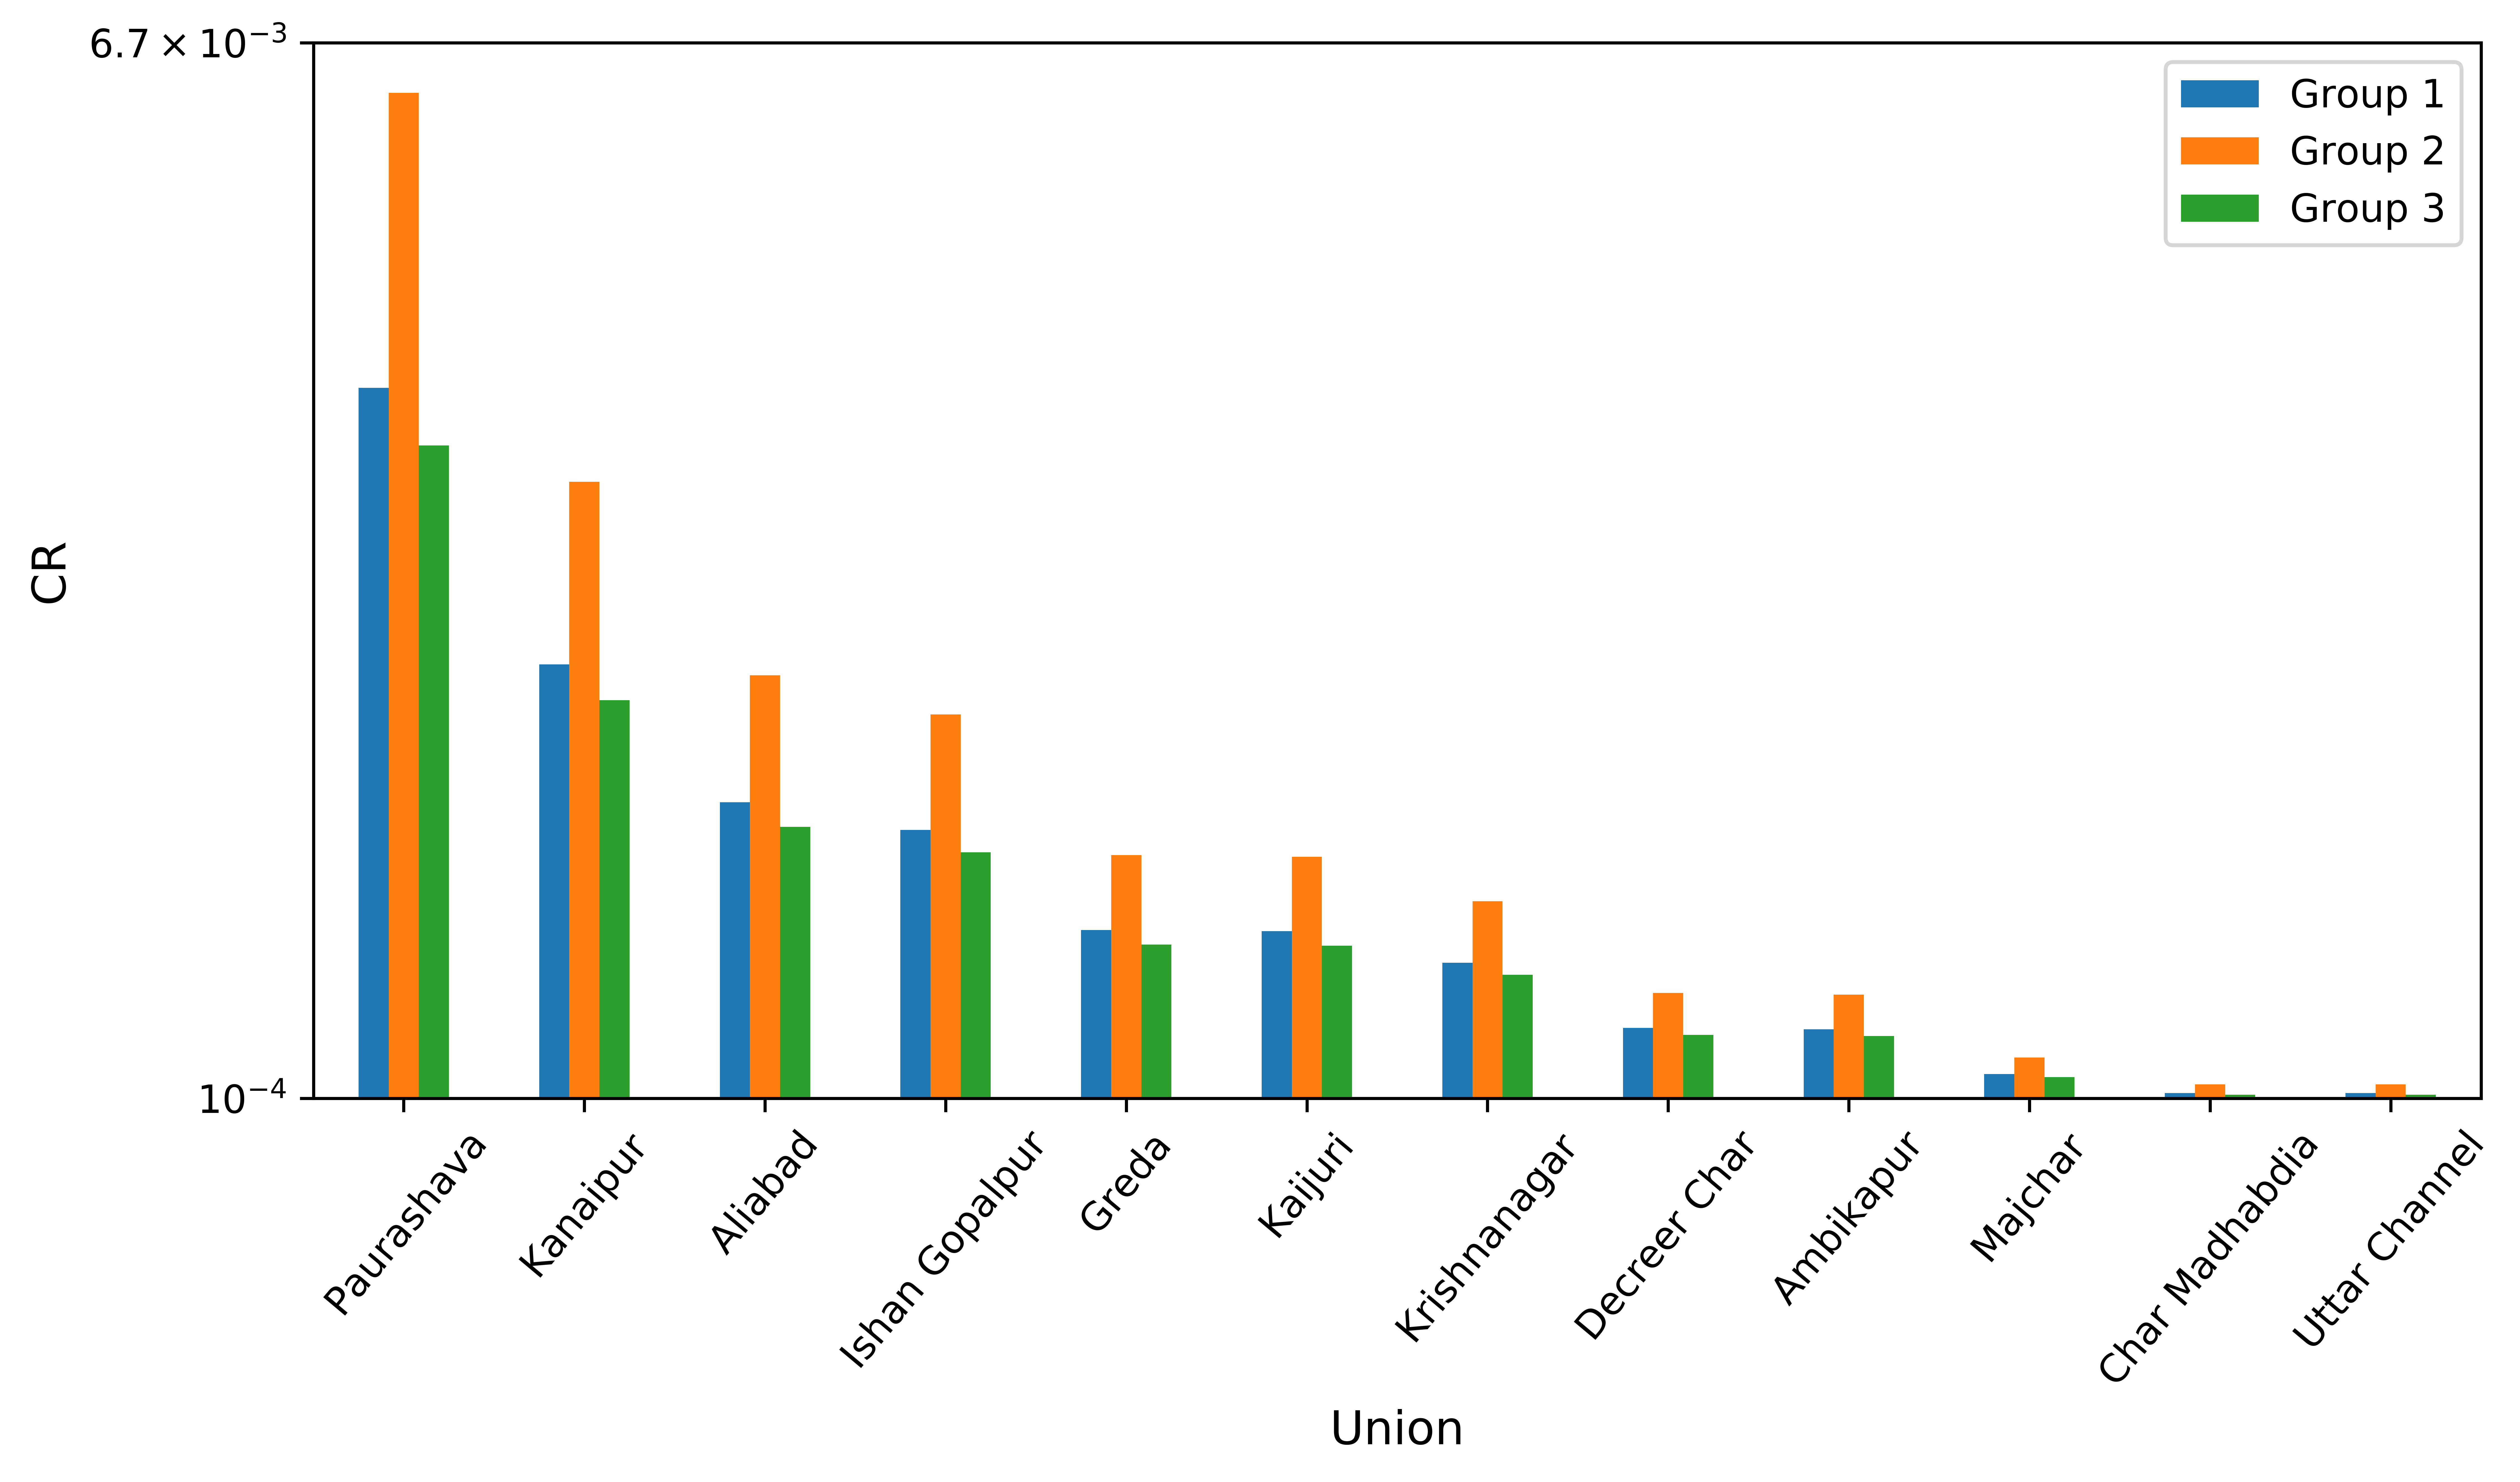

In [5]:
df2.groupby(by = "UNION").mean().sort_values(by=['Group 1'], ascending=False).plot(kind="bar",figsize=(10, 5),sharey=True)
plt.xticks(rotation = 50)

plt.yscale('symlog')
plt.xlabel('Union',fontsize = 'large')
plt.ylabel('CR',fontsize = 'large')
# plt.LogLocator(numticks=9, numdecs=10)
plt.ylim(.000100,6.7*10**-3)

# plt.yticks.set_major_Locator(ticker.MaxNLocator(5))



In [11]:
df = pd.read_excel("arsenic hazard totaaaal.xlsx",'Sheet1')
print(df)
# x=df.groupby(by = "UNION").mean().sort_values(by=['Group 1'], ascending=False)



          UNION   Group 1   Group 2   Group 3
0    Paurashava  0.000233  0.000327  0.000214
1    Paurashava  0.032919  0.046286  0.030306
2    Paurashava  0.000133  0.000187  0.000122
3    Paurashava  0.000133  0.000187  0.000122
4    Paurashava  0.000133  0.000187  0.000122
..          ...       ...       ...       ...
59      Aliabad  0.000133  0.000187  0.000122
60      Aliabad  0.000565  0.000795  0.000520
61      Aliabad  0.000133  0.000187  0.000122
62      Aliabad  0.003059  0.004301  0.002816
63      Aliabad  0.002993  0.004208  0.002755

[64 rows x 4 columns]


In [25]:
a.std()

38.02511738980569

In [8]:
print(df.mean())

Station       1.000000
Latitude     23.591833
Longitude    89.815016
AsIII        47.484375
Group 1       0.001579
Group 2       0.002220
Group 3       0.001454
Group 1.1     0.982435
Group 2.1     1.036023
Group 3.1     0.407009
dtype: float64


In [9]:
df.std()

Station        0.000000
Latitude       0.046104
Longitude      0.048968
AsIII        128.138813
Group 1        0.004261
Group 2        0.005991
Group 3        0.003923
Group 1.1      2.651148
Group 2.1      2.795756
Group 3.1      1.098333
dtype: float64

In [6]:
print(len(adult_names)/len(df)*100 )

23.4375


In [22]:
adult_names = df.loc[df["AsIII"] > 10, "AsIII"]
adult_names

In [8]:
print(len(adult_names)/len(df)*100 )

43.75


In [11]:
adult_names = df.loc[df["AsIII"] <= 10, "AsIII"]
len(adult_names)

36

In [12]:
print(len(adult_names)/len(df)*100 )

56.25


In [23]:
# hq1 = df.loc[df["Group 1.1"] > 1, "Group 1.1"]
# print(len(hq1)/len(df)*100 )

In [12]:
hq1 = df.loc[df["Group 2.1"] > 1, "Group 2.1"]
print(len(hq1)/len(df)*100 )

26.5625


In [13]:
hq1 = df.loc[df["Group 3.1"] > 1, "Group 3.1"]
print(len(hq1)/len(df)*100 )

7.8125


In [14]:
df

UNION  Station  Latitude  Longitude  AsIII   Group 1   Group 2  \
0    Paurashava        1   23.6147    89.8553      7  0.000233  0.000327   
1    Paurashava        1   23.6075    89.8633    990  0.032919  0.046286   
2    Paurashava        1   23.6064    89.8444      4  0.000133  0.000187   
3    Paurashava        1   23.6014    89.8378      4  0.000133  0.000187   
4    Paurashava        1   23.5872    89.8133      4  0.000133  0.000187   
..          ...      ...       ...        ...    ...       ...       ...   
59      Aliabad        1   23.5586    89.9025      4  0.000133  0.000187   
60      Aliabad        1   23.5969    89.8769     17  0.000565  0.000795   
61      Aliabad        1   23.5783    89.8942      4  0.000133  0.000187   
62      Aliabad        1   23.5842    89.8611     92  0.003059  0.004301   
63      Aliabad        1   23.5919    89.8417     90  0.002993  0.004208   

     Group 3  Group 1.1  Group 2.1  Group 3.1  
0   0.000214   0.144828   0.152727   0.060000  
1   0.030306  20.482759  21.600000   8.485714  
2   0.000122   0.082759   0.087273   0.034286  
3   0.000122   0.082759   0.087273   0.034286  
4   0.000122   0.082759   0.087273   0.034286  
..       ...        ...        ...        ...  
59  0.000122   0.082759   0.087273   0.034286  
60  0.000520   0.351724   0.370909   0.145714  
61  0.000122   0.082759   0.087273   0.034286  
62  0.002816   1.903448   2.007273   0.788571  
63  0.002755   1.862069   1.963636   0.771429  

[64 rows x 11 columns]

In [53]:
b= df.loc[df["Group 3"] <.0009, "Group 3"]
len(b)


43

In [65]:
df.describe()

Station   Latitude  Longitude       AsIII    Group 1    Group 2  \
count     64.0  64.000000  64.000000   64.000000  64.000000  64.000000   
mean       1.0  23.591833  89.815016   47.484375   0.001579   0.002220   
std        0.0   0.046104   0.048968  128.138813   0.004261   0.005991   
min        1.0  23.495800  89.697500    4.000000   0.000133   0.000187   
25%        1.0  23.563475  89.785750    4.000000   0.000133   0.000187   
50%        1.0  23.586250  89.816250    5.000000   0.000166   0.000234   
75%        1.0  23.616850  89.846575   46.750000   0.001554   0.002186   
max        1.0  23.696400  89.902500  990.000000   0.032919   0.046286   

         Group 3  Group 1.1  Group 2.1  Group 3.1  
count  64.000000  64.000000  64.000000  64.000000  
mean    0.001454   0.982435   1.036023   0.407009  
std     0.003923   2.651148   2.795756   1.098333  
min     0.000122   0.082759   0.087273   0.034286  
25%     0.000122   0.082759   0.087273   0.034286  
50%     0.000153   0.103448   0.109091   0.042857  
75%     0.001431   0.967241   1.020000   0.400714  
max     0.030306  20.482759  21.600000   8.485714

In [6]:
df = pd.read_excel('Faridpur data.xlsx')
df

Rank  SAMPLE_ID SAMPLE_FIELD_ID SAMPLE_DATE  LAT_DEG  LONG_DEG  \
0      1  S98_00766          BTS201    06/03/98  23.6147   89.8553   
1      2  S98_00767          BTS202    06/03/98  23.6075   89.8633   
2      3  S98_00768          BTS203    06/03/98  23.6031   89.8272   
3      4  S98_00769          BTS204    06/03/98  23.6064   89.8444   
4      5  S98_00770          BTS205    06/03/98  23.5689   89.8536   
..   ...        ...             ...         ...      ...       ...   
59    60  S98_00830          BTS260    15/03/98  23.5789   89.8411   
60    61  S98_00831          BTS261    16/03/98  23.6339   89.7581   
61    62  S98_00832          BTS262    16/03/98  23.5897   89.8128   
62    63  S98_00833          BTS263    16/03/98  23.6033   89.8408   
63    64  S98_00834          BTS264    16/03/98  23.5919   89.8417   

    YEAR_CONSTRUCTION      WELL_TYPE  WELL_DEPTH                     OWNER  \
0                1983  Private HP TW        24.4                 Tepokhola   
1                1997  Private HP TW        27.4    Mr Md Mubarak Mattaber   
2                1980  Private HP TW        36.6   Goalchaot Wireless para   
3                1996  Private HP TW        18.9             DCs residence   
4                1983  Private HP TW        45.7      Mr Solimuddin Mollik   
..                ...            ...         ...                       ...   
59               1994  Private HP TW        32.0       Mr Abdul Hakim Khan   
60               1996  Private HP TW        16.8           Mr Md Hashem Sk   
61               1993  Private HP TW        50.0       Mr Anil Kumar Shaha   
62               1993     Test HP TW       185.0  Old water works compound   
63               1995  Private HP TW        50.0        Mr Abdul Aziz Khan   

    ...     T       Tb  Th      Tl       Tm       U      V      Y       Yb  \
0   ...  25.8  < 0.005 NaN  < 0.01  < 0.005    2.51  < 0.2  0.082  < 0.008   
1   ...  25.7  < 0.005 NaN  < 0.01  < 0.005    0.16  < 0.2  0.013  < 0.008   
2   ...  26.3  < 0.005 NaN  < 0.01  < 0.005    0.04  < 0.2  0.017  < 0.008   
3   ...  26.6  < 0.005 NaN  < 0.01  < 0.005    1.36  < 0.2  0.048  < 0.008   
4   ...  26.2  < 0.005 NaN  < 0.01  < 0.005  < 0.01  < 0.2  0.019  < 0.008   
..  ...   ...      ...  ..     ...      ...     ...    ...    ...      ...   
59  ...  26.0  < 0.005 NaN  < 0.01  < 0.005    0.01    1.2  0.053    0.009   
60  ...  25.9  < 0.005 NaN  < 0.01  < 0.005    1.14  < 0.2  0.076  < 0.008   
61  ...  26.2  < 0.005 NaN  < 0.01  < 0.005  < 0.01  < 0.2  0.020  < 0.008   
62  ...  27.2  < 0.005 NaN    0.01  < 0.005    0.09  < 0.2  0.016    0.008   
63  ...  25.6  < 0.005 NaN  < 0.01  < 0.005  < 0.01  < 0.2  0.018  < 0.008   

      Zn  
0   20.0  
1   12.0  
2    NaN  
3   19.0  
4    7.0  
..   ...  
59  28.0  
60  18.0  
61   5.0  
62   NaN  
63  19.0  

[64 rows x 85 columns]

In [8]:
df.describe()

Rank    LAT_DEG   LONG_DEG  YEAR_CONSTRUCTION  WELL_DEPTH  \
count  64.000000  64.000000  64.000000          64.000000   64.000000   
mean   32.500000  23.591833  89.815016        1990.390625   46.229688   
std    18.618987   0.046104   0.048968           6.433092   43.011585   
min     1.000000  23.495800  89.697500        1968.000000   13.700000   
25%    16.750000  23.563475  89.785750        1988.000000   24.400000   
50%    32.500000  23.586250  89.816250        1992.500000   32.000000   
75%    48.250000  23.616850  89.846575        1995.000000   49.775000   
max    64.000000  23.696400  89.902500        1997.000000  213.400000   

            GEOCODE         Al        HCO3         Ba         Ca  ...  \
count  6.400000e+01  64.000000   64.000000  64.000000   64.00000  ...   
mean   2.554361e+09   7.375000  541.812500   0.171719  103.72500  ...   
std    1.350970e+09  12.864989  127.345658   0.068782   35.51816  ...   
min    3.294719e+06   1.000000  200.000000   0.049000   34.80000  ...   
25%    3.294715e+09   3.000000  476.250000   0.122500   78.27500  ...   
50%    3.294747e+09   4.000000  554.500000   0.164000  101.00000  ...   
75%    3.294764e+09   6.000000  612.500000   0.201750  123.25000  ...   
max    3.294788e+09  93.000000  848.000000   0.439000  190.00000  ...   

              Pb         pH         Rb          SEC        Si         Sr  \
count  64.000000  64.000000  64.000000    64.000000  64.00000  64.000000   
mean    0.595625   6.905781   3.812500   791.812500  17.26750   0.411344   
std     3.558716   0.186086   2.793388   238.146139   6.20415   0.123740   
min     0.020000   6.380000   0.300000   344.000000   6.32000   0.148000   
25%     0.070000   6.817500   1.150000   624.250000  14.10000   0.334500   
50%     0.120000   6.935000   3.850000   759.000000  16.15000   0.386500   
75%     0.172500   7.010000   5.850000   911.750000  18.92500   0.482750   
max    28.600000   7.350000  10.600000  1760.000000  41.90000   0.769000   

               T   Th          Y         Zn  
count  64.000000  0.0  64.000000  60.000000  
mean   26.328125  NaN   0.042297  10.350000  
std     0.611392  NaN   0.033861  10.209376  
min    25.400000  NaN   0.011000   2.000000  
25%    25.800000  NaN   0.019000   4.000000  
50%    26.250000  NaN   0.029000   7.000000  
75%    26.700000  NaN   0.053500  10.000000  
max    28.100000  NaN   0.155000  58.000000  

[8 rows x 39 columns]

In [15]:
x.replace(to_replace= '< 6',value = 0,inplace =True)     #x.replace('< 6',0)
x.head(15)

0       7
1     990
2      27
3       0
4       0
5      39
6       0
7       0
8      42
9     192
10      0
11     99
12    125
13     46
14     40
Name: AsIII, dtype: int64

In [16]:
y.min()

200

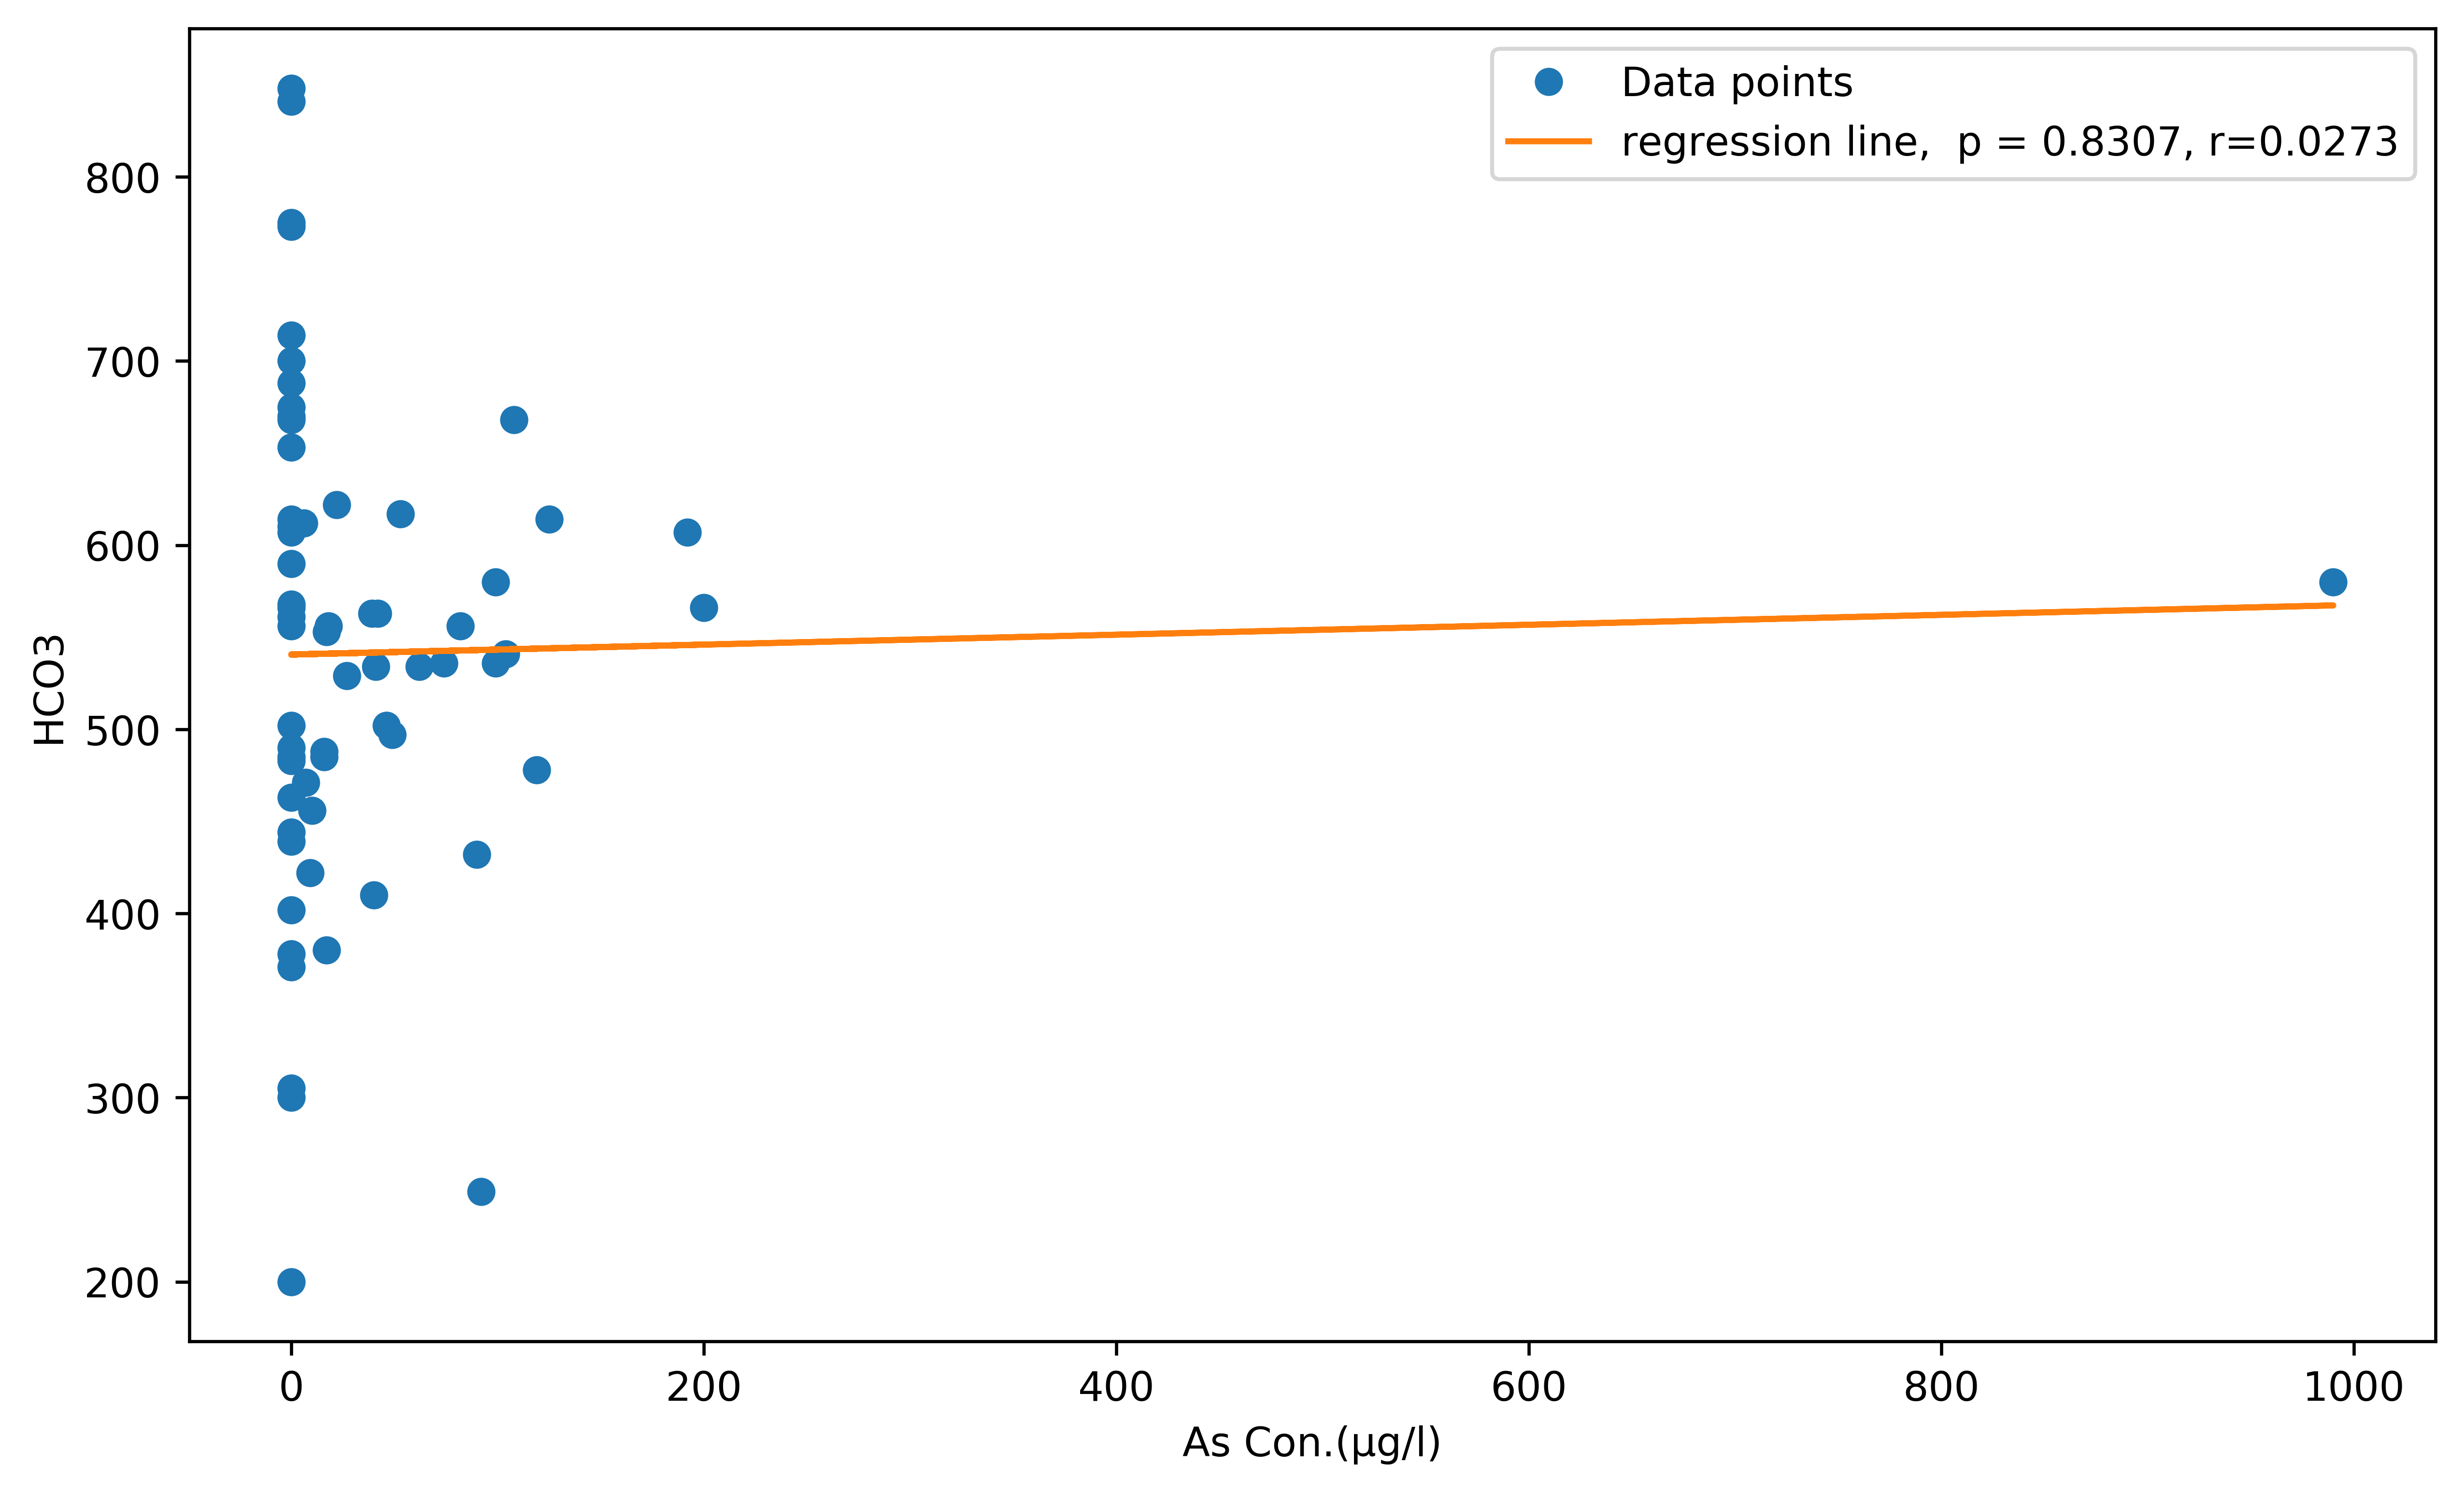

In [18]:
# slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

line = f'regression line,  p = {p:.4f}, r={r:.4f}'

fig, ax = plt.subplots(figsize = (10,6),dpi=600)
ax.plot(x, y,  linewidth=0,marker='o', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('As Con.(µg/l)')
ax.set_ylabel('HCO3')
ax.legend(facecolor='white')

plt.show()


In [2]:
3*100/15


20.0

In [4]:
df2 = pd.read_excel("arsenic hazard totaaaal.xlsx",'Sheet4')
df2.head()

As  Index
0   40    110
1   46    110
2  104    110
3   42    110
4  192    110

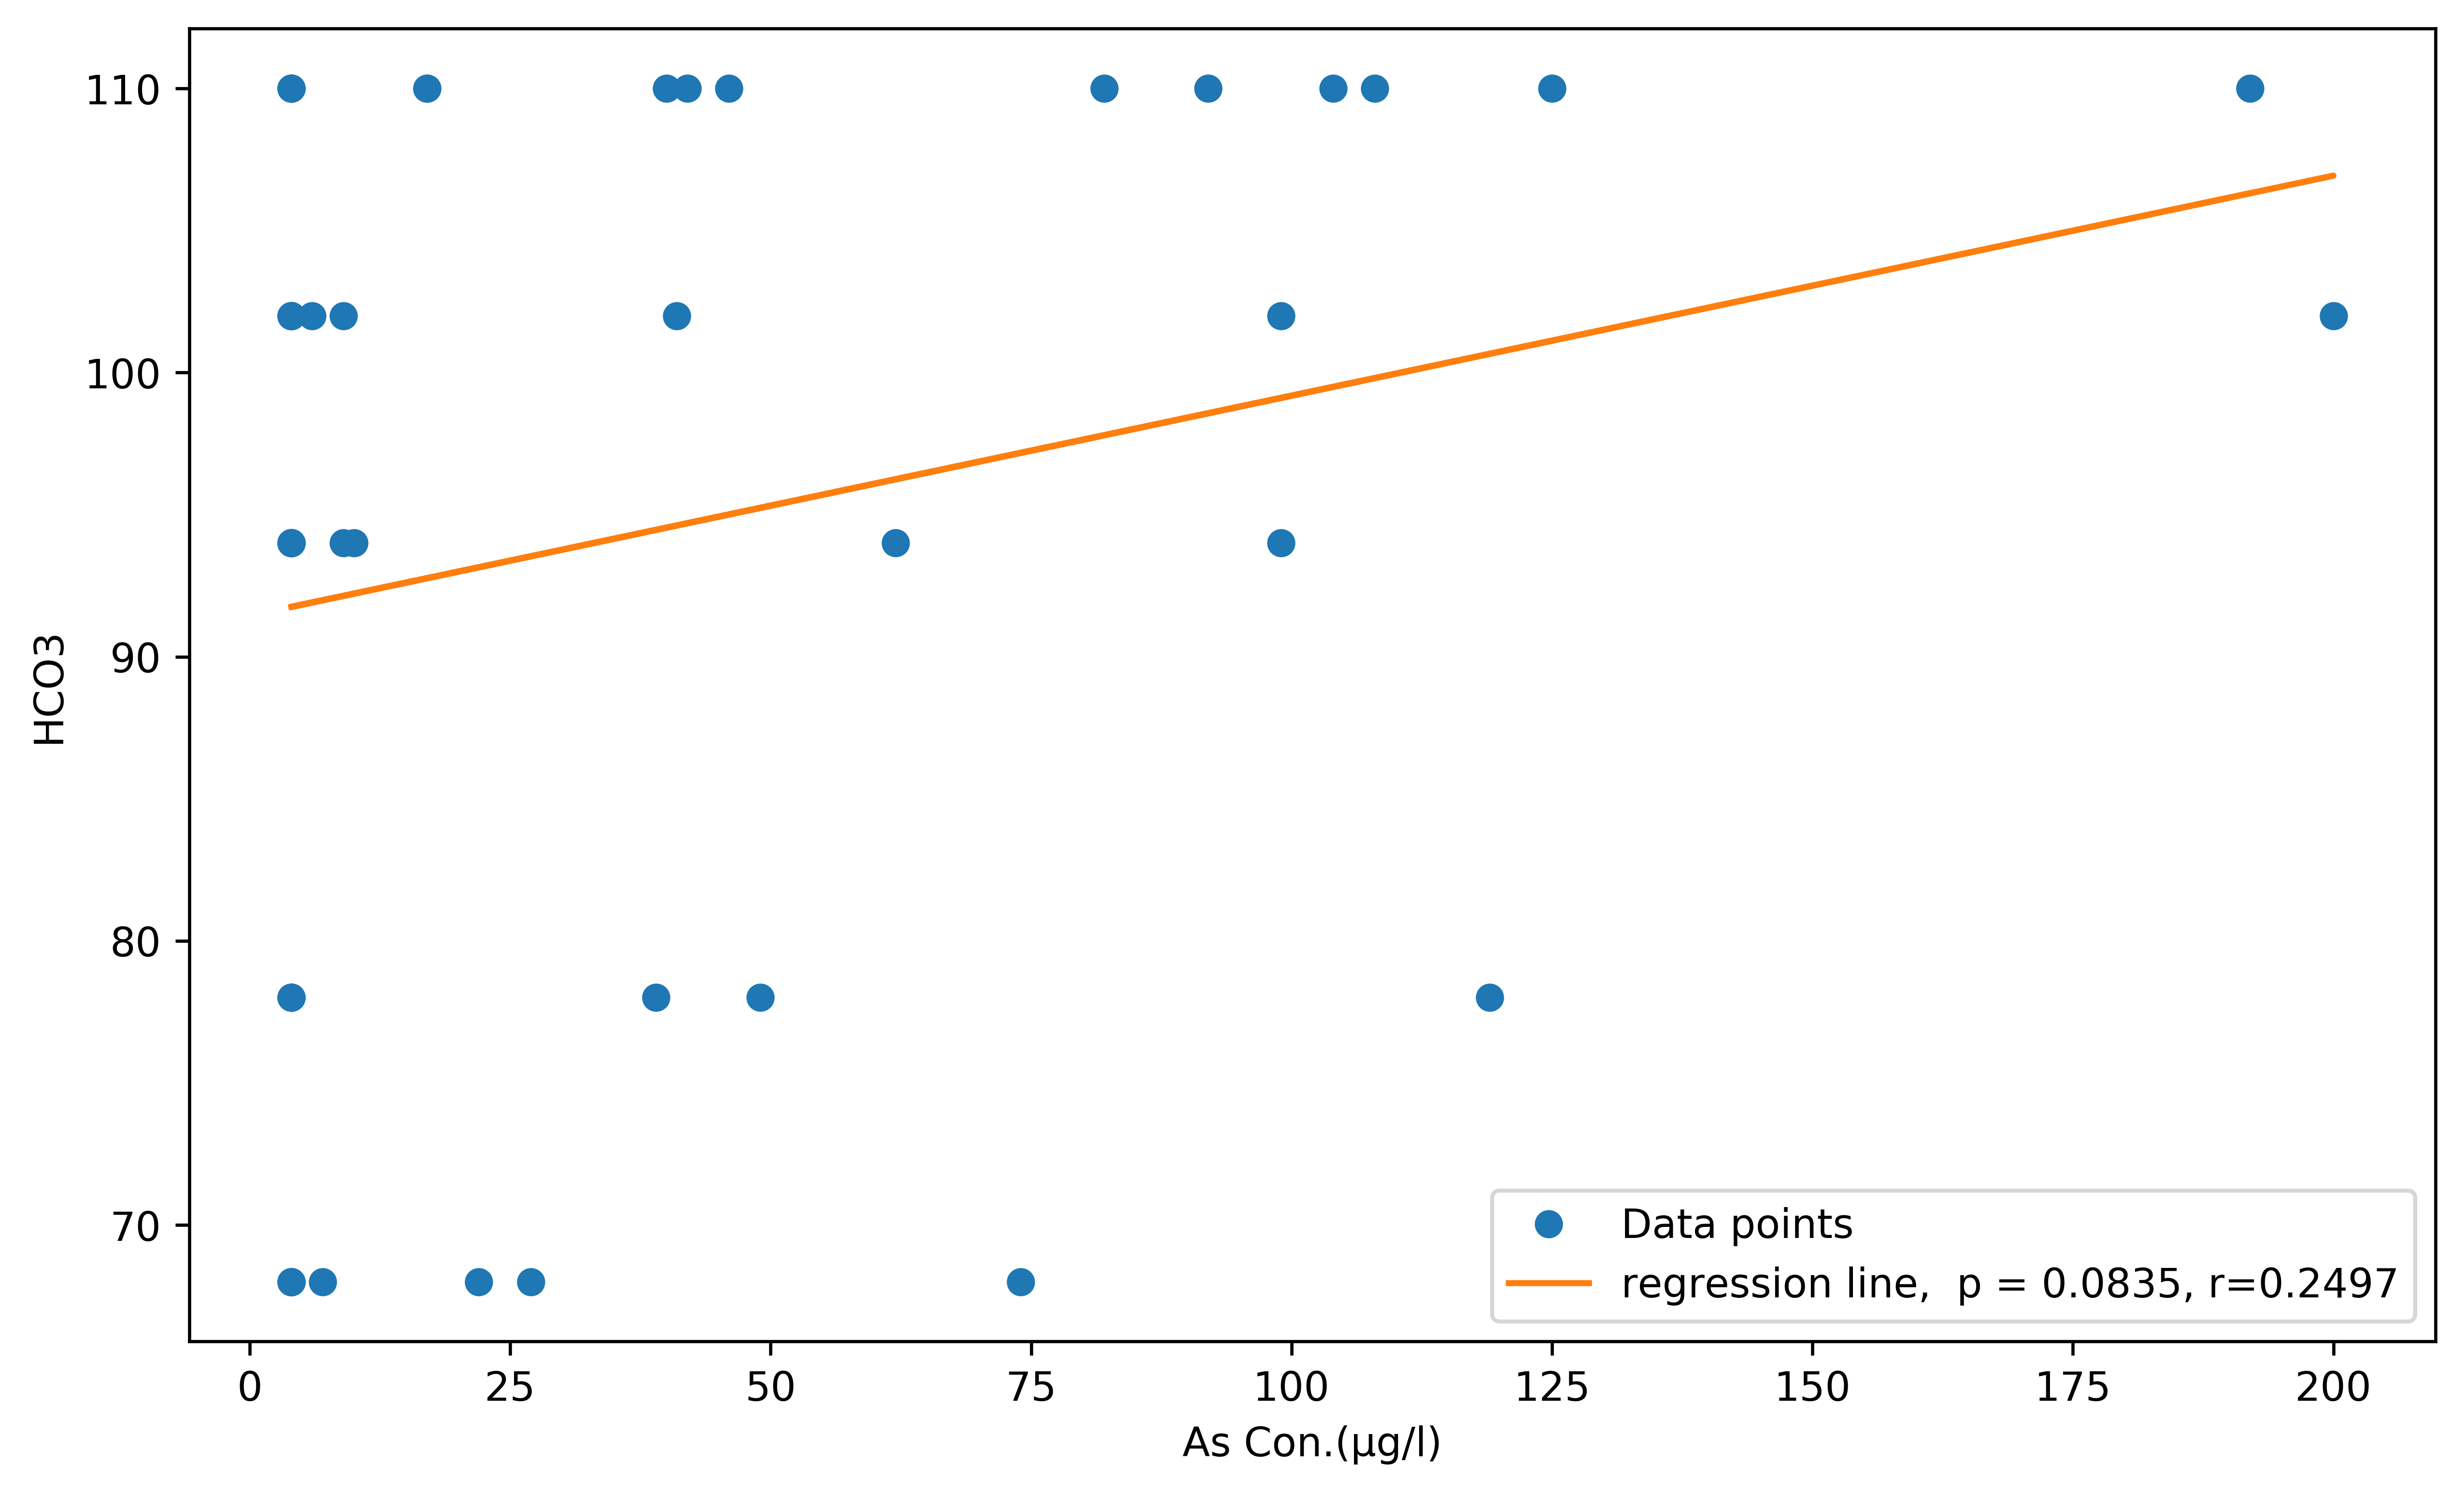

In [6]:
x=df2["As"]
# x = x.astype('int64')

y=df2["Index"]
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

line = f'regression line,  p = {p:.4f}, r={r:.4f}'

fig, ax = plt.subplots(figsize = (10,6),dpi=600)
ax.plot(x, y,  linewidth=0,marker='o', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('As Con.(µg/l)')
ax.set_ylabel('HCO3')
ax.legend(facecolor='white')

plt.show()

In [12]:
df = pd.read_excel("faridpur modified.xls",'Sheet3')
df

SAMPLE_ID sample field SAMPLE_DATE  LAT_DEG  LONG_DEG  WELL_DEPTH  \
0   S98_00766       BTS201    06/03/98  23.6147   89.8553        24.4   
1   S98_00767       BTS202    06/03/98  23.6075   89.8633        27.4   
2   S98_00768       BTS203    06/03/98  23.6031   89.8272        36.6   
3   S98_00769       BTS204    06/03/98  23.6064   89.8444        18.9   
4   S98_00783       BTS217    08/03/98  23.5586   89.9025        41.1   
..        ...          ...         ...      ...       ...         ...   
59  S98_00827       BTS257    15/03/98  23.5842   89.8611        49.7   
60  S98_00832       BTS262    16/03/98  23.5897   89.8128        50.0   
61  S98_00834       BTS264    16/03/98  23.5919   89.8417        50.0   
62  S98_00796       BTS228    10/03/98  23.5825   89.8403       137.2   
63  S98_00807       BTS239    12/03/98  23.5436   89.7678        46.3   

                  UNION  Conductivy(mm/d)       Aquifer media  \
0   Faridpur Paurashava                 8  fine sand and silt   
1   Faridpur Paurashava                 8  fine sand and silt   
2             Ambikapur                 8  fine sand and silt   
3   Faridpur Paurashava                 8  fine sand and silt   
4               Aliabad                12           fine sand   
..                  ...               ...                 ...   
59              Aliabad                17  fine & medium sand   
60  Faridpur Paurashava                17  fine & medium sand   
61              Aliabad                17  fine & medium sand   
62              Kaijuri                17  fine & medium sand   
63             Kanaipur                17  fine & medium sand   

         vadose zone Soil  AQ  Unnamed: 12   No3-  Unnamed: 14  
0          fine sand  NaN   1          NaN    NaN          NaN  
1          fine sand  NaN   2          NaN    NaN          NaN  
2          fine sand  NaN   3          NaN    NaN          NaN  
3          fine sand  NaN   4          NaN    NaN          NaN  
4   silt & fine sand  NaN   5          NaN    NaN          NaN  
..               ...  ...  ..          ...    ...          ...  
59              silt  NaN  60          NaN  < 0.3          NaN  
60              silt  NaN  61          NaN  < 0.3          NaN  
61              silt  NaN  62          NaN  < 0.3          NaN  
62       coarse sand  NaN  63          NaN  < 0.3          NaN  
63              silt  NaN  64          NaN  < 0.3          NaN  

[64 rows x 15 columns]

In [8]:
# b= df.loc[df["WELL_DEPTH"] >80]
# len(b)
adult_names =df['WELL_DEPTH'].between(30,90)  
len(df[adult_names])

29

In [16]:
b= df.loc[df["Aquifer media"] == 'fine sand', "Aquifer media"]
b

4     fine sand
8     fine sand
33    fine sand
34    fine sand
35    fine sand
36    fine sand
37    fine sand
38    fine sand
39    fine sand
40    fine sand
41    fine sand
Name: Aquifer media, dtype: object

In [23]:
b= df.loc[df["Aquifer media"] == 'fine & medium sand', "Aquifer media"]
len(b)

15

In [9]:
print(29*100/64)
print(11*100/64)
print(15*100/64)
print(7*100/64)

45.3125
17.1875
23.4375
10.9375


In [25]:
31+11+15

57

In [3]:
df = pd.read_excel("vadose.xls",'Sheet4')
df

Rank      LAT     LONG  DEPTH                UNION  Conductivy(mm/d)  \
0      1  23.6147  89.8553   24.4  Faridpur Paurashava                 8   
1      2  23.6075  89.8633   27.4  Faridpur Paurashava                 8   
2      3  23.6064  89.8444   18.9  Faridpur Paurashava                 8   
3      4  23.5872  89.8133  204.0  Faridpur Paurashava                 4   
4      5  23.5872  89.8133  213.4  Faridpur Paurashava                 4   
..   ...      ...      ...    ...                  ...               ...   
58    60  23.5567  89.8686   45.7                Greda                 1   
59    61  23.5311  89.8531   50.3                Greda                17   
60    62  23.6700  89.7253   29.0       Ishan Gopalpur                 8   
61    63  23.6603  89.7639   28.0       Ishan Gopalpur                 8   
62    64  23.6436  89.7828   38.7       Ishan Gopalpur                 8   

    Unnamed: 6 vadose zone  VZ  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0          NaN   fine sand   4         NaN          NaN          NaN   
1          NaN   fine sand   4         NaN          6.0          NaN   
2          NaN   fine sand   4         NaN          NaN          NaN   
3          NaN   fine sand   4         NaN          NaN          NaN   
4          NaN   fine sand   4         NaN          NaN          NaN   
..         ...         ...  ..         ...          ...          ...   
58         NaN   fine sand   4         NaN          NaN          NaN   
59         NaN        silt   5         NaN          NaN          NaN   
60         NaN   fine sand   4         NaN          NaN          NaN   
61         NaN   fine sand   4         NaN          NaN          NaN   
62         NaN   fine sand   4         NaN          NaN          NaN   

    Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0           NaN          NaN          NaN          NaN          NaN   
1           NaN          NaN          NaN          NaN          NaN   
2           NaN          NaN          NaN          NaN          NaN   
3           NaN          NaN          NaN          NaN          NaN   
4           NaN          NaN          NaN          NaN          NaN   
..          ...          ...          ...          ...          ...   
58          NaN          NaN          NaN          NaN          NaN   
59          NaN          NaN          NaN          NaN          NaN   
60          NaN          NaN          NaN          NaN          NaN   
61          NaN          NaN          NaN          NaN          NaN   
62          NaN          NaN          NaN          NaN          NaN   

    Unnamed: 17   No3-      Aquifer media  
0           NaN    NaN          fine sand  
1           NaN    NaN          fine sand  
2           NaN    NaN          fine sand  
3           NaN  < 0.3  silt to fine sand  
4           NaN  < 0.3  silt to fine sand  
..          ...    ...                ...  
58          NaN  < 0.3               silt  
59          NaN  < 0.3        medium sand  
60          NaN    NaN          fine sand  
61          NaN    NaN          fine sand  
62          NaN    NaN          fine sand  

[63 rows x 20 columns]

In [8]:
b= df.loc[df["vadose zone"] == 'silt', "vadose zone"]
len(b)

12

In [9]:
b= df.loc[df["vadose zone"] == 'medium sand', "vadose zone"]
len(b)

1

In [10]:
print(30*100/64)
print(19*100/64)
print(12*100/64)
print(1*100/64)

46.875
29.6875
18.75
1.5625


# WQI

In [14]:
def equ (c,w,s):
    rw = w/49
    wqi = rw *(c/s)*100
    print(wqi)
equ(22.5,4,200)


0.9183673469387754


Drastic_index   -0.390610
WELL_DEPTH       2.748803
Final index      2.305485
HCO3            -0.104736
Ca               0.378794
Cl               2.581103
F                1.489871
Fe               0.912829
K                0.738517
Mg               0.174392
Na               2.048597
NO3              3.949536
pH              -0.334684
SO4              3.962840
Mn               2.525428
AsIII            6.561250
DOC              1.875857
dtype: float64

In [9]:
def wqi (x,y):
    
    i=x+y
    return i
        
        
a=wqi(4,2)
print(a)


6


In [3]:
df = pd.read_excel("arsenic hazard totaaaal.xlsx",'wqi')
df.drop(['LAT_DEG', 'LONG_DEG', 'Station', 'GWQI', 'HI  for group3',
       'HI for group2', 'UNION', 'WELL_DEPTH'],axis=1,inplace=True)

In [4]:
df

HCO3     Ca    Cl     F      Fe    K    Mg     Na  NO3    pH   SO4     Mn  \
0    471  127.0  27.6  0.20   0.447  4.5  27.8   22.5  0.2  6.84  13.5  1.470   
1    580  142.0   9.3  0.40   4.240  3.9  29.6   25.0  0.2  7.17   0.2  1.130   
2    529  116.0  33.9  0.20   9.600  3.9  32.5   19.0  0.2  6.99   8.2  1.130   
3    568  116.0  16.5  0.10   0.944  6.2  30.6   30.9  0.2  6.82   3.9  0.999   
4    561   88.4  13.5  0.24   7.680  5.0  40.0   36.6  4.7  6.82   0.5  0.080   
..   ...    ...   ...   ...     ...  ...   ...    ...  ...   ...   ...    ...   
59   485   67.9  12.7  0.14  18.400  4.2  44.0   18.6  0.2  6.38   0.5  0.246   
60   485  103.0   4.8  0.08   0.879  3.2  29.8    9.7  0.2  6.83   0.1  0.822   
61   536   76.4   7.5  0.20   8.270  4.8  36.3   39.0  0.2  6.85   0.1  0.078   
62   668  106.0  78.2  0.15   3.530  4.6  41.1  108.0  0.2  6.88   0.1  0.581   
63   432   54.6   4.8  0.16   6.270  6.1  31.0   32.2  0.2  6.88   0.1  0.136   

    AsIII  
0       7  
1     990  
2      27  
3       4  
4       4  
..    ...  
59     16  
60      4  
61     74  
62      4  
63     90  

[64 rows x 13 columns]

In [15]:
def equ (c,w,s):
    rw = w/49
    wqi = rw *(c/s)*100
    return wqi


x=equ(df.HCO3,4,.1)
print(x)
df['HCO3_wq'] = x
df

# print(df.skew())

0     38448.979592
1     47346.938776
2     43183.673469
3     46367.346939
4     45795.918367
          ...     
59    39591.836735
60    39591.836735
61    43755.102041
62    54530.612245
63    35265.306122
Name: HCO3, Length: 64, dtype: float64


HCO3     Ca    Cl     F      Fe    K    Mg     Na  NO3    pH   SO4     Mn  \
0    471  127.0  27.6  0.20   0.447  4.5  27.8   22.5  0.2  6.84  13.5  1.470   
1    580  142.0   9.3  0.40   4.240  3.9  29.6   25.0  0.2  7.17   0.2  1.130   
2    529  116.0  33.9  0.20   9.600  3.9  32.5   19.0  0.2  6.99   8.2  1.130   
3    568  116.0  16.5  0.10   0.944  6.2  30.6   30.9  0.2  6.82   3.9  0.999   
4    561   88.4  13.5  0.24   7.680  5.0  40.0   36.6  4.7  6.82   0.5  0.080   
..   ...    ...   ...   ...     ...  ...   ...    ...  ...   ...   ...    ...   
59   485   67.9  12.7  0.14  18.400  4.2  44.0   18.6  0.2  6.38   0.5  0.246   
60   485  103.0   4.8  0.08   0.879  3.2  29.8    9.7  0.2  6.83   0.1  0.822   
61   536   76.4   7.5  0.20   8.270  4.8  36.3   39.0  0.2  6.85   0.1  0.078   
62   668  106.0  78.2  0.15   3.530  4.6  41.1  108.0  0.2  6.88   0.1  0.581   
63   432   54.6   4.8  0.16   6.270  6.1  31.0   32.2  0.2  6.88   0.1  0.136   

    AsIII       HCO3_wq  
0       7  38448.979592  
1     990  47346.938776  
2      27  43183.673469  
3       4  46367.346939  
4       4  45795.918367  
..    ...           ...  
59     16  39591.836735  
60      4  39591.836735  
61     74  43755.102041  
62      4  54530.612245  
63     90  35265.306122  

[64 rows x 14 columns]

In [10]:
# df.to_excel("new HQqqqqqqqqqqqqqqqq for Fe.xlsx",'Arsenic')

0     471
1     580
2     529
3     568
4     561
     ... 
59    485
60    485
61    536
62    668
63    432
Name: HCO3, Length: 64, dtype: int64

<IPython.core.display.Javascript object>


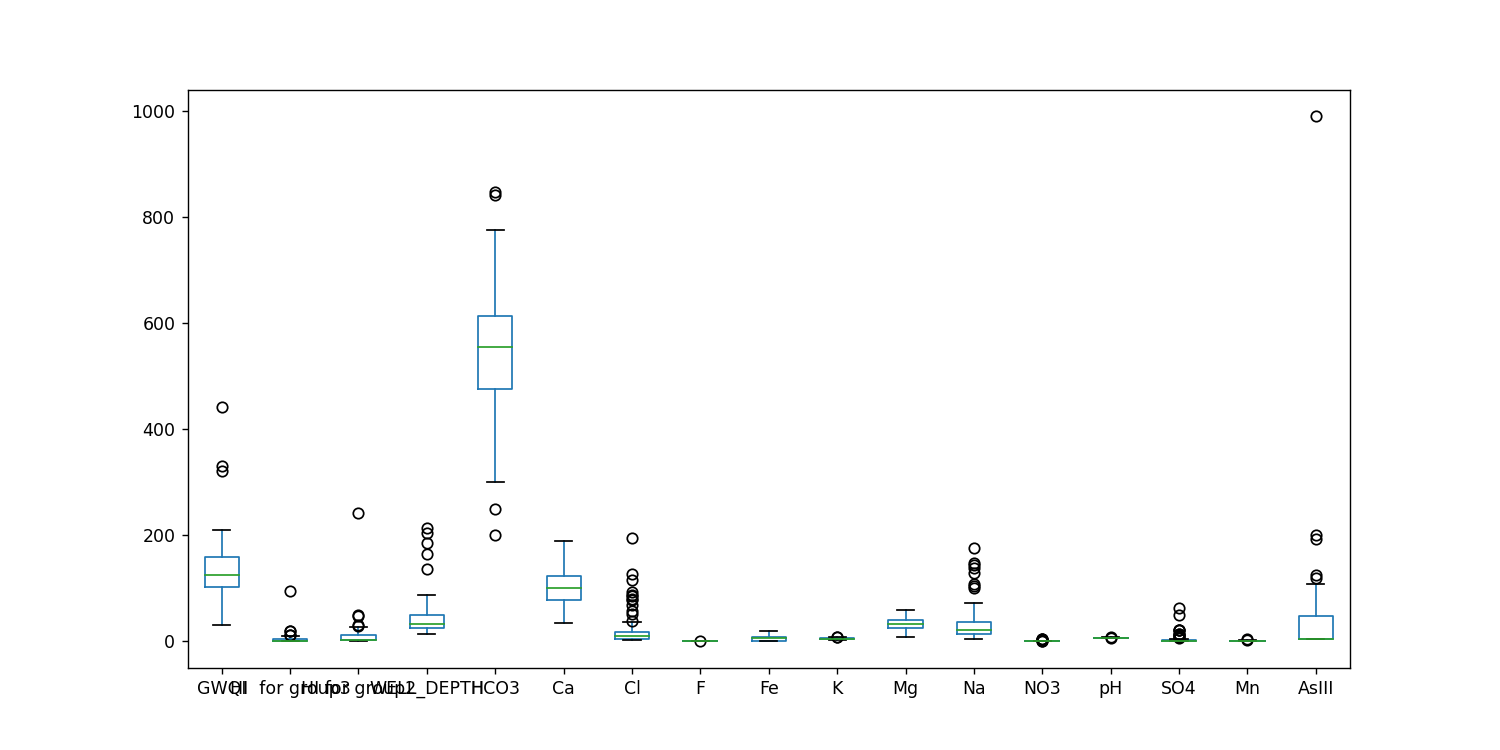

In [20]:
df = pd.read_excel("arsenic hazard totaaaal.xlsx",'wqi')
# df.mean().to_frame()

# df['as2'] = np.log(df.AsIII) 
# df['mn2'] = np.log(df.Mn)
# df.SO4  = np.log(df.SO4 )

df.drop(['LAT_DEG', 'LONG_DEG','Station'],inplace =True,axis =1)
df.plot.box(figsize=(12,6))




<IPython.core.display.Javascript object>


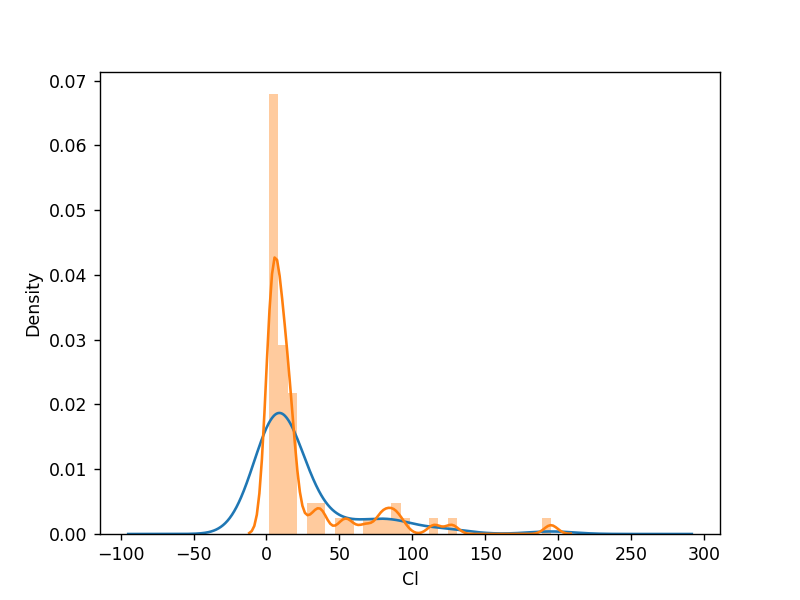

In [25]:
plt.figure()
df.Cl.plot.kde()

In [26]:
# plt.figure()
sns.distplot(df.Cl)
print(df.Cl.min())

1.8


In [3]:
x=df.corr()
# x.to_excel("correlationnnnn.xlsx")

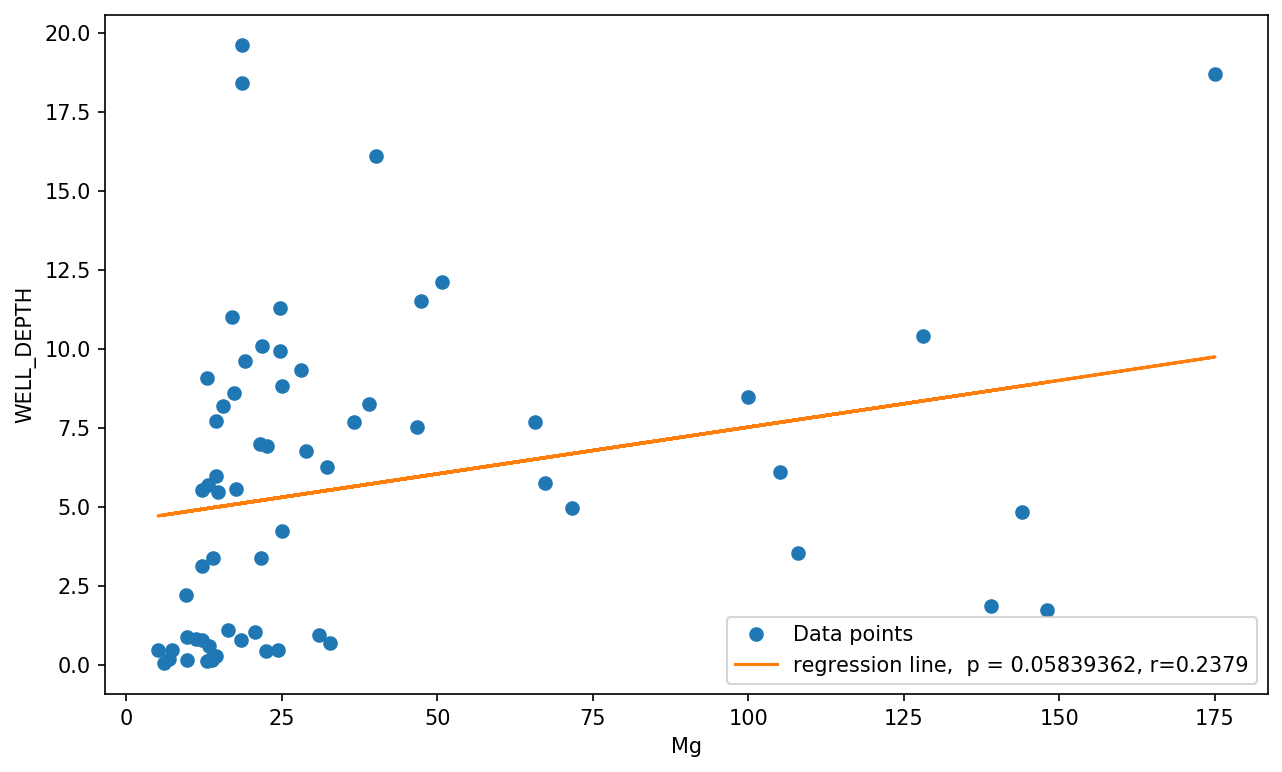

In [24]:
x=df.Na
y=df.Fe
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
# slope, intercept, rho, p, stderr = scipy.stats.spearmanr(x, y)
line = f'regression line,  p = {p:.8f}, r={r:.4f}'

fig, ax = plt.subplots(figsize = (10,6),dpi=150)
ax.plot(x, y,  linewidth=0,marker='o', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Mg')
ax.set_ylabel('WELL_DEPTH')
ax.legend(facecolor='white')

plt.show()

In [18]:
# df.corr(method = 'spearman')

In [5]:
# fig,ax = plt.subplots(figsize=(10, 8))
# ax.xaxis.tick_top()

# # plt.figure(dpi=600)

# ax.plot(df.Na,df.WELL_DEPTH)
# # plt.gca().invert_yaxis()
# # ax.invert_yxaxis()


In [6]:
adult_names = df.loc[df["UNION"] == 'Decreer Char']
len(adult_names)

4

In [7]:
len(adult_names)/64

0.0625

In [8]:
adult_names

UNION  WELL_DEPTH  HCO3     Ca    Cl     F     Fe    K    Mg    Na  \
45  Decreer Char        22.3   675  161.0  11.0  0.04  0.800  6.2  38.4  18.4   
46  Decreer Char        26.8   670  158.0   4.8  0.02  1.040  5.3  33.2  20.7   
47  Decreer Char        26.8   617  134.0  11.3  0.08  6.940  4.4  32.2  22.6   
55  Decreer Char        14.0   841  190.0   2.0  0.02  0.294  7.6  51.0  14.4   

    NO3    pH   SO4    Mn  AsIII  
45  0.2  6.83  22.0  1.29      4  
46  0.2  6.88   0.3  1.64      4  
47  0.2  6.83   2.0  4.23     53  
55  0.2  6.73   2.1  1.71      4

In [19]:
# y=df.groupby("UNION").mean()
# y

# Finally got that range

In [5]:
y=df['HCO3']
def fun (data):
    for i in data: 
        if 300<= i and i<=400:
            print(i)
print(fun(y)) 


300
305
371
380
378
None


In [ ]:
And_df = df[(df['HCO3']<=300) & (df['HCO3']>=400)]

In [42]:
adult_names =df['HCO3'].between(300,400)  
len(df[adult_names])

5

In [10]:
df[adult_names]

UNION  Drastic_index  WELL_DEPTH  Final index  HCO3     Ca  \
4               Aliabad             84        45.7    95.650850   561   88.4   
8               Kaijuri            101        49.7    93.849830   563  115.0   
12              Kaijuri            108        53.3    90.667007   614   57.1   
13                Greda            107        50.3    91.867007   502   43.9   
14                Greda            108        32.0    56.148129   410   49.2   
16              Aliabad             94        41.1    85.063095   714  167.0   
18       Char Madhabdia            102        24.4    56.008503   300   78.6   
21            Ambikapur             97        32.0    97.385714   402  101.0   
27              Kaijuri            116       137.2    70.356293   610   67.2   
28  Faridpur Paurashava             80       204.0    57.865986   653  120.0   
29  Faridpur Paurashava             80       213.4    86.637755   612  125.0   
31              Majchar             97        35.1    91.391667   439  102.0   
32         Krishnanagar             97        28.3    68.973469   371   89.3   
41              Kaijuri            100        54.3    88.694388   541   64.3   
43                Greda             98        45.7    95.616837   556   56.4   
48       Char Madhabdia            107        21.9    90.456973   444  115.0   
53              Majchar            104        15.8    67.088605   378   92.1   
56              Aliabad            110        49.7    69.557653   249   34.8   
60              Majchar            105        16.8    90.877381   485  103.0   
63              Aliabad             99        50.0    95.674660   432   54.6   

       Cl     F     Fe    K    Mg     Na  NO3    pH   SO4     Mn  AsIII  DOC  
4    13.5  0.24  7.680  5.0  40.0   36.6  4.7  6.82   0.5  0.080      4  6.6  
8    16.2  0.10  6.760  5.4  29.9   28.9  0.2  6.67   0.3  0.170     42  3.8  
12   56.7  0.19  4.840  5.1  26.3  144.0  0.2  6.81   0.6  0.080    125  8.8  
13   86.0  0.18  6.110  8.6  41.9  105.0  0.2  6.57   0.6  0.081     46  6.5  
14    2.0  0.09  3.370  6.1  37.0   14.0  0.2  7.04   0.1  0.041     40  1.0  
16    5.5  0.14  1.100  4.4  34.3   16.4  0.2  7.10   0.5  0.700      4  3.2  
18   18.6  0.10  0.224  3.5  14.5   13.8  0.2  7.23  11.0  0.478      4  1.0  
21   16.0  0.06  0.827  4.4  18.8   11.2  0.2  7.01  10.8  0.919      4  0.3  
27   93.0  0.14  1.730  3.4  28.4  148.0  0.2  6.75   0.1  0.371      4  1.4  
28  195.0  0.16  1.850  5.4  46.8  139.0  0.2  6.93   0.4  0.101      4  2.8  
29  115.0  0.10  5.740  5.1  49.1   67.3  0.2  7.22   0.2  0.133      6  1.5  
31    4.2  0.06  0.776  3.6  21.9   12.2  0.2  7.01   3.3  0.854      4  2.0  
32    4.0  0.11  0.479  3.7  19.7    5.1  0.2  7.22   2.8  0.611      4  NaN  
41   36.6  0.20  4.960  6.3  39.0   71.6  0.2  7.00   0.5  0.092    104  4.6  
43   16.4  0.20  7.680  6.8  32.0   65.7  0.2  6.57   0.5  0.111     18  4.6  
48   13.8  0.06  0.119  5.3  24.3   12.9  0.2  7.03  21.7  0.884      4  NaN  
53   17.1  0.13  0.604  3.5  22.2   13.3  0.2  7.02  13.5  0.557      4  0.2  
56    4.0  0.16  3.370  3.8  17.2   21.7  0.2  7.09   0.1  0.149     92  3.9  
60    4.8  0.08  0.879  3.2  29.8    9.7  0.2  6.83   0.1  0.822      4  NaN  
63    4.8  0.16  6.270  6.1  31.0   32.2  0.2  6.88   0.1  0.136     90  NaN

In [11]:
adult_names = df.loc[df["Fe"] >.3]
len(adult_names)


57

In [14]:
x=df.AsIII
y=df.Fe
# slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
rho, p = scipy.stats.spearmanr(x, y)
print(rho,'...........',p)

0.35012300474647484 ........... 0.004566139515469756


In [16]:
df.groupby(['UNION']).count()['HCO3'].to_frame()


HCO3
UNION                    
Aliabad                 7
Ambikapur               3
Char Madhabdia          4
Decreer Char            4
Faridpur Paurashava     8
Greda                   3
Ishan Gopalpur          4
Kaijuri                13
Kanaipur                5
Krishnanagar            6
Majchar                 5
Uttar Channel           2

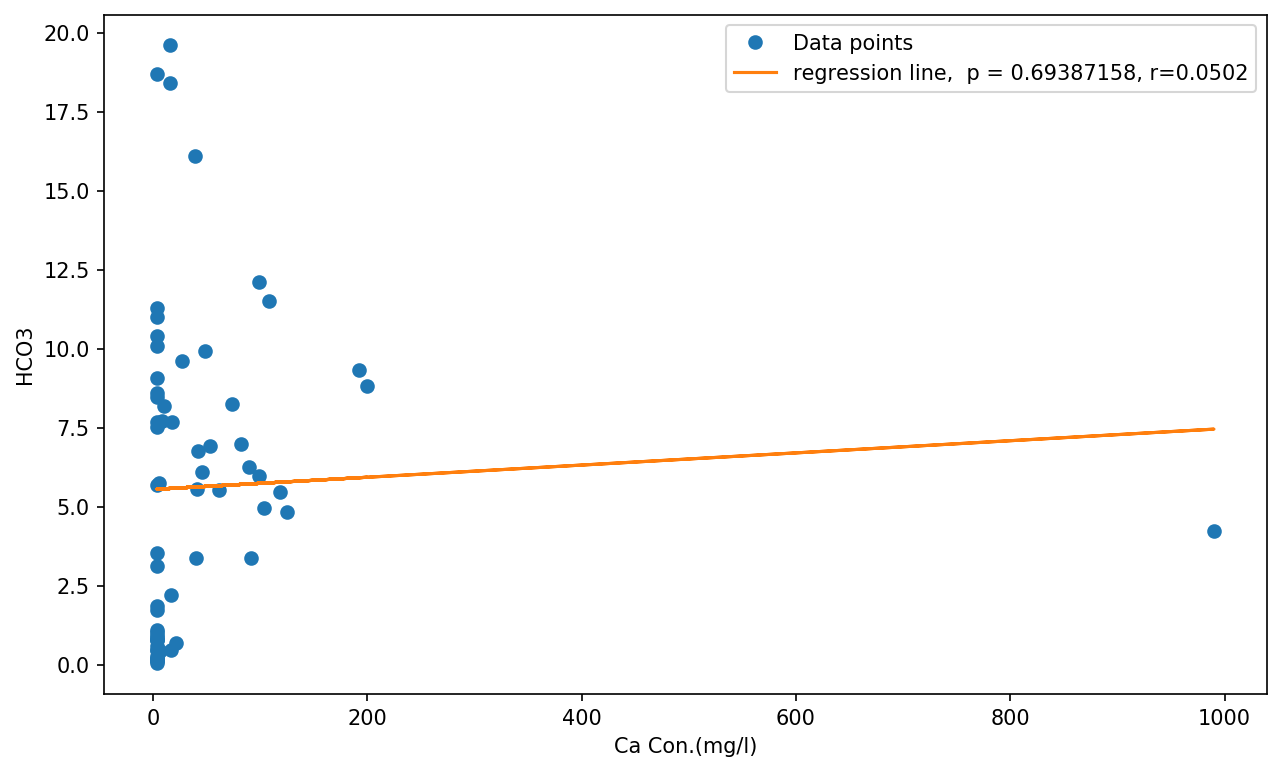

In [17]:
x=df.AsIII
y=df.Fe
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

line = f'regression line,  p = {p:.3f}, r={r:.3f}'

fig, ax = plt.subplots(figsize = (10,6),dpi=150)
ax.plot(x, y,  linewidth=0,marker='o', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Ca Con.(mg/l)')
ax.set_ylabel('HCO3')
ax.legend(facecolor='white')

plt.show()

In [5]:
 splita = df.loc[df["WELL_DEPTH"] <28]
print(len(splita))


26


In [6]:

splita.corr()

Drastic_index  WELL_DEPTH  Final index      HCO3        Ca  \
Drastic_index       1.000000   -0.485478    -0.503070 -0.123995 -0.168231   
WELL_DEPTH         -0.485478    1.000000     0.367562 -0.064739 -0.226951   
Final index        -0.503070    0.367562     1.000000  0.493072  0.470886   
HCO3               -0.123995   -0.064739     0.493072  1.000000  0.865164   
Ca                 -0.168231   -0.226951     0.470886  0.865164  1.000000   
Cl                  0.119731    0.043814    -0.066607  0.094885 -0.100604   
F                  -0.344224    0.424737     0.273844 -0.167052 -0.259380   
Fe                 -0.049609    0.590161     0.341054  0.157111 -0.186778   
K                   0.124860   -0.303927     0.115577  0.735555  0.661726   
Mg                 -0.028771   -0.266580     0.388274  0.915859  0.861113   
Na                 -0.020351    0.320496     0.088624  0.317666 -0.107061   
NO3                 0.207658    0.228297     0.010847  0.090838 -0.002282   
pH                  0.057631    0.159661    -0.326167 -0.812924 -0.679041   
SO4                 0.210596   -0.303145    -0.136808  0.024928  0.246928   
Mn                 -0.432030    0.059456     0.812097  0.444008  0.554346   
AsIII              -0.318315    0.273496     0.476790  0.091252  0.133472   
DOC                 0.162655    0.409282    -0.057220  0.213789 -0.183426   

                     Cl         F        Fe         K        Mg        Na  \
Drastic_index  0.119731 -0.344224 -0.049609  0.124860 -0.028771 -0.020351   
WELL_DEPTH     0.043814  0.424737  0.590161 -0.303927 -0.266580  0.320496   
Final index   -0.066607  0.273844  0.341054  0.115577  0.388274  0.088624   
HCO3           0.094885 -0.167052  0.157111  0.735555  0.915859  0.317666   
Ca            -0.100604 -0.259380 -0.186778  0.661726  0.861113 -0.107061   
Cl             1.000000  0.185742  0.139560  0.341750  0.191183  0.767065   
F              0.185742  1.000000  0.355239 -0.315840 -0.248844  0.326429   
Fe             0.139560  0.355239  1.000000 -0.175414 -0.031072  0.496067   
K              0.341750 -0.315840 -0.175414  1.000000  0.794281  0.323830   
Mg             0.191183 -0.248844 -0.031072  0.794281  1.000000  0.205408   
Na             0.767065  0.326429  0.496067  0.323830  0.205408  1.000000   
NO3           -0.170217  0.050119  0.426768 -0.057309 -0.035883  0.052946   
pH            -0.206597  0.334413 -0.087492 -0.662982 -0.857041 -0.269785   
SO4            0.490607 -0.248327 -0.397816  0.368772  0.315118 -0.063097   
Mn            -0.129234 -0.203516 -0.103670  0.241076  0.435102 -0.161789   
AsIII         -0.084567  0.790797  0.156670 -0.135005  0.011135  0.051284   
DOC            0.683702  0.398417  0.559371  0.260888  0.087251  0.849537   

                    NO3        pH       SO4        Mn     AsIII       DOC  
Drastic_index  0.207658  0.057631  0.210596 -0.432030 -0.318315  0.162655  
WELL_DEPTH     0.228297  0.159661 -0.303145  0.059456  0.273496  0.409282  
Final index    0.010847 -0.326167 -0.136808  0.812097  0.476790 -0.057220  
HCO3           0.090838 -0.812924  0.024928  0.444008  0.091252  0.213789  
Ca            -0.002282 -0.679041  0.246928  0.554346  0.133472 -0.183426  
Cl            -0.170217 -0.206597  0.490607 -0.129234 -0.084567  0.683702  
F              0.050119  0.334413 -0.248327 -0.203516  0.790797  0.398417  
Fe             0.426768 -0.087492 -0.397816 -0.103670  0.156670  0.559371  
K             -0.057309 -0.662982  0.368772  0.241076 -0.135005  0.260888  
Mg            -0.035883 -0.857041  0.315118  0.435102  0.011135  0.087251  
Na             0.052946 -0.269785 -0.063097 -0.161789  0.051284  0.849537  
NO3            1.000000 -0.106565 -0.138509 -0.237284  0.127078  0.156187  
pH            -0.106565  1.000000 -0.163670 -0.440316  0.253348 -0.133300  
SO4           -0.138509 -0.163670  1.000000  0.054428 -0.138734 -0.258828  
Mn            -0.237284 -0.440316  0.054428  1.000000  0.022569 -0.370697  
AsIII          0.127078  

In [7]:
splitb = df.loc[df["WELL_DEPTH"] >28] 
splitb.corr()

Drastic_index  WELL_DEPTH  Final index      HCO3        Ca  \
Drastic_index       1.000000   -0.183892    -0.165282 -0.151752 -0.449339   
WELL_DEPTH         -0.183892    1.000000    -0.280974  0.366858  0.129902   
Final index        -0.165282   -0.280974     1.000000  0.228640  0.049954   
HCO3               -0.151752    0.366858     0.228640  1.000000  0.527248   
Ca                 -0.449339    0.129902     0.049954  0.527248  1.000000   
Cl                 -0.172813    0.725808    -0.120606  0.524458  0.214222   
F                  -0.176012    0.083649    -0.052092  0.043324 -0.328875   
Fe                 -0.014623   -0.172759     0.808432  0.210582 -0.254373   
K                   0.112165    0.081343     0.191355  0.273638 -0.292791   
Mg                 -0.213818    0.358340     0.254256  0.592816  0.202309   
Na                  0.139601    0.569573    -0.087868  0.553366 -0.137560   
NO3                -0.046850   -0.085633    -0.036205  0.270370  0.173401   
pH                 -0.118403    0.184940    -0.487298 -0.213849  0.333208   
SO4                -0.296337   -0.161518     0.098051  0.048992  0.498446   
Mn                 -0.257140   -0.190809     0.223422 -0.053480  0.525804   
AsIII               0.201561   -0.254357     0.024057 -0.228072 -0.292293   
DOC                 0.222207   -0.046329     0.241951  0.321908 -0.334020   

                     Cl         F        Fe         K        Mg        Na  \
Drastic_index -0.172813 -0.176012 -0.014623  0.112165 -0.213818  0.139601   
WELL_DEPTH     0.725808  0.083649 -0.172759  0.081343  0.358340  0.569573   
Final index   -0.120606 -0.052092  0.808432  0.191355  0.254256 -0.087868   
HCO3           0.524458  0.043324  0.210582  0.273638  0.592816  0.553366   
Ca             0.214222 -0.328875 -0.254373 -0.292791  0.202309 -0.137560   
Cl             1.000000  0.094101 -0.137333  0.230839  0.362076  0.813014   
F              0.094101  1.000000  0.077683  0.196950  0.116263  0.272798   
Fe            -0.137333  0.077683  1.000000  0.358686  0.391244  0.004810   
K              0.230839  0.196950  0.358686  1.000000  0.512970  0.316455   
Mg             0.362076  0.116263  0.391244  0.512970  1.000000  0.182662   
Na             0.813014  0.272798  0.004810  0.316455  0.182662  1.000000   
NO3           -0.099834  0.119322  0.075509  0.144970  0.368881 -0.104176   
pH            -0.017489 -0.197352 -0.668139 -0.401619 -0.330773 -0.236215   
SO4            0.178900 -0.109459 -0.274248 -0.086701  0.044687 -0.109625   
Mn            -0.043392 -0.281365 -0.365021 -0.384492 -0.297752 -0.257265   
AsIII         -0.267187  0.117617 -0.014062  0.061357 -0.219682 -0.070103   
DOC            0.266768  0.368634  0.424855  0.324798  0.117847  0.581059   

                    NO3        pH       SO4        Mn     AsIII       DOC  
Drastic_index -0.046850 -0.118403 -0.296337 -0.257140  0.201561  0.222207  
WELL_DEPTH    -0.085633  0.184940 -0.161518 -0.190809 -0.254357 -0.046329  
Final index   -0.036205 -0.487298  0.098051  0.223422  0.024057  0.241951  
HCO3           0.270370 -0.213849  0.048992 -0.053480 -0.228072  0.321908  
Ca             0.173401  0.333208  0.498446  0.525804 -0.292293 -0.334020  
Cl            -0.099834 -0.017489  0.178900 -0.043392 -0.267187  0.266768  
F              0.119322 -0.197352 -0.109459 -0.281365  0.117617  0.368634  
Fe             0.075509 -0.668139 -0.274248 -0.365021 -0.014062  0.424855  
K              0.144970 -0.401619 -0.086701 -0.384492  0.061357  0.324798  
Mg             0.368881 -0.330773  0.044687 -0.297752 -0.219682  0.117847  
Na            -0.104176 -0.236215 -0.109625 -0.257265 -0.070103  0.581059  
NO3            1.000000 -0.073255 -0.059392 -0.173100 -0.185683  0.031812  
pH            -0.073255  1.000000  0.072061  0.317970  0.129816 -0.514392  
SO4           -0.059392  0.072061  1.000000  0.591346 -0.117817 -0.218557  
Mn            -0.173100  0.317970  0.591346  1.000000 -0.185389 -0.379834  
AsIII         -0.185683  

In [8]:
splita.corr(method = 'spearman')

Drastic_index  WELL_DEPTH  Final index      HCO3        Ca  \
Drastic_index       1.000000   -0.476723    -0.353022 -0.089711 -0.179110   
WELL_DEPTH         -0.476723    1.000000     0.300516  0.022985 -0.155774   
Final index        -0.353022    0.300516     1.000000  0.714872  0.786801   
HCO3               -0.089711    0.022985     0.714872  1.000000  0.802188   
Ca                 -0.179110   -0.155774     0.786801  0.802188  1.000000   
Cl                  0.069361   -0.073782    -0.190492 -0.107387 -0.123824   
F                  -0.165635    0.473323    -0.171403 -0.371717 -0.532542   
Fe                 -0.228043    0.600004     0.394188  0.250598 -0.034536   
K                   0.141657   -0.151547     0.372946  0.698289  0.564995   
Mg                 -0.078082   -0.095043     0.594632  0.917422  0.781464   
Na                 -0.418736    0.428279     0.363543  0.476744  0.280828   
NO3                 0.137578    0.247861     0.046199  0.147222  0.063458   
pH                  0.038079    0.123217    -0.450420 -0.745677 -0.526380   
SO4                 0.188311   -0.414308    -0.175969 -0.063363  0.165838   
Mn                 -0.312211   -0.112389     0.706224  0.547880  0.815803   
AsIII              -0.172831    0.341871     0.308885 -0.016914  0.034237   
DOC                 0.020255    0.466257     0.030742  0.151954 -0.134387   

                     Cl         F        Fe         K        Mg        Na  \
Drastic_index  0.069361 -0.165635 -0.228043  0.141657 -0.078082 -0.418736   
WELL_DEPTH    -0.073782  0.473323  0.600004 -0.151547 -0.095043  0.428279   
Final index   -0.190492 -0.171403  0.394188  0.372946  0.594632  0.363543   
HCO3          -0.107387 -0.371717  0.250598  0.698289  0.917422  0.476744   
Ca            -0.123824 -0.532542 -0.034536  0.564995  0.781464  0.280828   
Cl             1.000000  0.149254 -0.071135  0.263275  0.058492  0.351865   
F              0.149254  1.000000  0.456042 -0.439930 -0.459046  0.219664   
Fe            -0.071135  0.456042  1.000000 -0.161987  0.112498  0.528728   
K              0.263275 -0.439930 -0.161987  1.000000  0.717247  0.338301   
Mg             0.058492 -0.459046  0.112498  0.717247  1.000000  0.488285   
Na             0.351865  0.219664  0.528728  0.338301  0.488285  1.000000   
NO3           -0.406693  0.076897  0.210053 -0.061088  0.032653  0.175618   
pH            -0.113072  0.341728 -0.179826 -0.649168 -0.849093 -0.390098   
SO4            0.517753 -0.315306 -0.701120  0.451714  0.092477 -0.117812   
Mn            -0.033527 -0.551913 -0.189124  0.435081  0.591756  0.044475   
AsIII         -0.201831  0.371577  0.465140 -0.431647 -0.079551  0.254605   
DOC           -0.153779  0.411588  0.330259  0.147007  0.088752  0.302418   

                    NO3        pH       SO4        Mn     AsIII       DOC  
Drastic_index  0.137578  0.038079  0.188311 -0.312211 -0.172831  0.020255  
WELL_DEPTH     0.247861  0.123217 -0.414308 -0.112389  0.341871  0.466257  
Final index    0.046199 -0.450420 -0.175969  0.706224  0.308885  0.030742  
HCO3           0.147222 -0.745677 -0.063363  0.547880 -0.016914  0.151954  
Ca             0.063458 -0.526380  0.165838  0.815803  0.034237 -0.134387  
Cl            -0.406693 -0.113072  0.517753 -0.033527 -0.201831 -0.153779  
F              0.076897  0.341728 -0.315306 -0.551913  0.371577  0.411588  
Fe             0.210053 -0.179826 -0.701120 -0.189124  0.465140  0.330259  
K             -0.061088 -0.649168  0.451714  0.435081 -0.431647  0.147007  
Mg             0.032653 -0.849093  0.092477  0.591756 -0.079551  0.088752  
Na             0.175618 -0.390098 -0.117812  0.044475  0.254605  0.302418  
NO3            1.000000 -0.017897 -0.317677 -0.236005  0.277908  0.217090  
pH            -0.017897  1.000000 -0.082975 -0.487922  0.158769 -0.120599  
SO4           -0.317677 -0.082975  1.000000  0.297802 -0.400368 -0.289700  
Mn            -0.236005 -0.487922  0.297802  1.000000 -0.021351 -0.370663  
AsIII          0.277908  

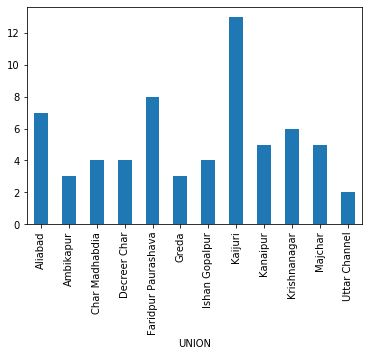

In [22]:
# df.groupby(['UNION']).count()['HCO3'].plot(kind='bar')

In [25]:
def equ (c,w,s):
    rw = w/49
    wqi = rw *(c/s)*100
    return (wqi)
x=equ(df.F,5,1.5)
df['f_wq'] = x
df

LAT_DEG  LONG_DEG                UNION  HCO3     Ca    Cl     F      Fe  \
0   23.6147   89.8553  Faridpur Paurashava   471  127.0  27.6  0.20   0.447   
1   23.6075   89.8633  Faridpur Paurashava   580  142.0   9.3  0.40   4.240   
2   23.6031   89.8272            Ambikapur   529  116.0  33.9  0.20   9.600   
3   23.6064   89.8444  Faridpur Paurashava   568  116.0  16.5  0.10   0.944   
4   23.5689   89.8536              Aliabad   561   88.4  13.5  0.24   7.680   
..      ...       ...                  ...   ...    ...   ...   ...     ...   
59  23.5789   89.8411              Kaijuri   485   67.9  12.7  0.14  18.400   
60  23.6339   89.7581              Majchar   485  103.0   4.8  0.08   0.879   
61  23.5897   89.8128  Faridpur Paurashava   536   76.4   7.5  0.20   8.270   
62  23.6033   89.8408  Faridpur Paurashava   668  106.0  78.2  0.15   3.530   
63  23.5919   89.8417              Aliabad   432   54.6   4.8  0.16   6.270   

      K    Mg     Na  NO3    pH   SO4     Mn  AsIII   HCO3_wq      ca_wq  \
0   4.5  27.8   22.5  0.2  6.84  13.5  1.470      7  1.922449  10.367347   
1   3.9  29.6   25.0  0.2  7.17   0.2  1.130    990  2.367347  11.591837   
2   3.9  32.5   19.0  0.2  6.99   8.2  1.130     27  2.159184   9.469388   
3   6.2  30.6   30.9  0.2  6.82   3.9  0.999      4  2.318367   9.469388   
4   5.0  40.0   36.6  4.7  6.82   0.5  0.080      4  2.289796   7.216327   
..  ...   ...    ...  ...   ...   ...    ...    ...       ...        ...   
59  4.2  44.0   18.6  0.2  6.38   0.5  0.246     16  1.979592   5.542857   
60  3.2  29.8    9.7  0.2  6.83   0.1  0.822      4  1.979592   8.408163   
61  4.8  36.3   39.0  0.2  6.85   0.1  0.078     74  2.187755   6.236735   
62  4.6  41.1  108.0  0.2  6.88   0.1  0.581      4  2.726531   8.653061   
63  6.1  31.0   32.2  0.2  6.88   0.1  0.136     90  1.763265   4.457143   

       cl_wq      f_wq  
0   1.126531  1.360544  
1   0.379592  2.721088  
2   1.383673  1.360544  
3   0.673469  0.680272  
4   0.551020  1.632653  
..       ...       ...  
59  0.518367  0.952381  
60  0.195918  0.544218  
61  0.306122  1.360544  
62  3.191837  1.020408  
63  0.195918  1.088435  

[64 rows x 20 columns]

In [26]:
def equ (c,w,s):
    rw = w/49
    wqi = rw *(c/s)*100
    return (wqi)
x=equ(df.Fe,4,1)
df['fe_wq'] = x
df

LAT_DEG  LONG_DEG                UNION  HCO3     Ca    Cl     F      Fe  \
0   23.6147   89.8553  Faridpur Paurashava   471  127.0  27.6  0.20   0.447   
1   23.6075   89.8633  Faridpur Paurashava   580  142.0   9.3  0.40   4.240   
2   23.6031   89.8272            Ambikapur   529  116.0  33.9  0.20   9.600   
3   23.6064   89.8444  Faridpur Paurashava   568  116.0  16.5  0.10   0.944   
4   23.5689   89.8536              Aliabad   561   88.4  13.5  0.24   7.680   
..      ...       ...                  ...   ...    ...   ...   ...     ...   
59  23.5789   89.8411              Kaijuri   485   67.9  12.7  0.14  18.400   
60  23.6339   89.7581              Majchar   485  103.0   4.8  0.08   0.879   
61  23.5897   89.8128  Faridpur Paurashava   536   76.4   7.5  0.20   8.270   
62  23.6033   89.8408  Faridpur Paurashava   668  106.0  78.2  0.15   3.530   
63  23.5919   89.8417              Aliabad   432   54.6   4.8  0.16   6.270   

      K    Mg  ...  NO3    pH   SO4     Mn  AsIII   HCO3_wq      ca_wq  \
0   4.5  27.8  ...  0.2  6.84  13.5  1.470      7  1.922449  10.367347   
1   3.9  29.6  ...  0.2  7.17   0.2  1.130    990  2.367347  11.591837   
2   3.9  32.5  ...  0.2  6.99   8.2  1.130     27  2.159184   9.469388   
3   6.2  30.6  ...  0.2  6.82   3.9  0.999      4  2.318367   9.469388   
4   5.0  40.0  ...  4.7  6.82   0.5  0.080      4  2.289796   7.216327   
..  ...   ...  ...  ...   ...   ...    ...    ...       ...        ...   
59  4.2  44.0  ...  0.2  6.38   0.5  0.246     16  1.979592   5.542857   
60  3.2  29.8  ...  0.2  6.83   0.1  0.822      4  1.979592   8.408163   
61  4.8  36.3  ...  0.2  6.85   0.1  0.078     74  2.187755   6.236735   
62  4.6  41.1  ...  0.2  6.88   0.1  0.581      4  2.726531   8.653061   
63  6.1  31.0  ...  0.2  6.88   0.1  0.136     90  1.763265   4.457143   

       cl_wq      f_wq       fe_wq  
0   1.126531  1.360544    3.648980  
1   0.379592  2.721088   34.612245  
2   1.383673  1.360544   78.367347  
3   0.673469  0.680272    7.706122  
4   0.551020  1.632653   62.693878  
..       ...       ...         ...  
59  0.518367  0.952381  150.204082  
60  0.195918  0.544218    7.175510  
61  0.306122  1.360544   67.510204  
62  3.191837  1.020408   28.816327  
63  0.195918  1.088435   51.183673  

[64 rows x 21 columns]

In [27]:
def equ (c,w,s):
    rw = w/49
    wqi = rw *(c/s)*100
    return (wqi)
x=equ(df.K,2,12)
df['K_wq'] = x
df

LAT_DEG  LONG_DEG                UNION  HCO3     Ca    Cl     F      Fe  \
0   23.6147   89.8553  Faridpur Paurashava   471  127.0  27.6  0.20   0.447   
1   23.6075   89.8633  Faridpur Paurashava   580  142.0   9.3  0.40   4.240   
2   23.6031   89.8272            Ambikapur   529  116.0  33.9  0.20   9.600   
3   23.6064   89.8444  Faridpur Paurashava   568  116.0  16.5  0.10   0.944   
4   23.5689   89.8536              Aliabad   561   88.4  13.5  0.24   7.680   
..      ...       ...                  ...   ...    ...   ...   ...     ...   
59  23.5789   89.8411              Kaijuri   485   67.9  12.7  0.14  18.400   
60  23.6339   89.7581              Majchar   485  103.0   4.8  0.08   0.879   
61  23.5897   89.8128  Faridpur Paurashava   536   76.4   7.5  0.20   8.270   
62  23.6033   89.8408  Faridpur Paurashava   668  106.0  78.2  0.15   3.530   
63  23.5919   89.8417              Aliabad   432   54.6   4.8  0.16   6.270   

      K    Mg  ...    pH   SO4     Mn  AsIII   HCO3_wq      ca_wq     cl_wq  \
0   4.5  27.8  ...  6.84  13.5  1.470      7  1.922449  10.367347  1.126531   
1   3.9  29.6  ...  7.17   0.2  1.130    990  2.367347  11.591837  0.379592   
2   3.9  32.5  ...  6.99   8.2  1.130     27  2.159184   9.469388  1.383673   
3   6.2  30.6  ...  6.82   3.9  0.999      4  2.318367   9.469388  0.673469   
4   5.0  40.0  ...  6.82   0.5  0.080      4  2.289796   7.216327  0.551020   
..  ...   ...  ...   ...   ...    ...    ...       ...        ...       ...   
59  4.2  44.0  ...  6.38   0.5  0.246     16  1.979592   5.542857  0.518367   
60  3.2  29.8  ...  6.83   0.1  0.822      4  1.979592   8.408163  0.195918   
61  4.8  36.3  ...  6.85   0.1  0.078     74  2.187755   6.236735  0.306122   
62  4.6  41.1  ...  6.88   0.1  0.581      4  2.726531   8.653061  3.191837   
63  6.1  31.0  ...  6.88   0.1  0.136     90  1.763265   4.457143  0.195918   

        f_wq       fe_wq      K_wq  
0   1.360544    3.648980  1.530612  
1   2.721088   34.612245  1.326531  
2   1.360544   78.367347  1.326531  
3   0.680272    7.706122  2.108844  
4   1.632653   62.693878  1.700680  
..       ...         ...       ...  
59  0.952381  150.204082  1.428571  
60  0.544218    7.175510  1.088435  
61  1.360544   67.510204  1.632653  
62  1.020408   28.816327  1.564626  
63  1.088435   51.183673  2.074830  

[64 rows x 22 columns]

In [28]:
def equ (c,w,s):
    rw = w/49
    wqi = rw *(c/s)*100
    return (wqi)
x=equ(df.Mg,3,30)
df['Mg_wq'] = x
df

LAT_DEG  LONG_DEG                UNION  HCO3     Ca    Cl     F      Fe  \
0   23.6147   89.8553  Faridpur Paurashava   471  127.0  27.6  0.20   0.447   
1   23.6075   89.8633  Faridpur Paurashava   580  142.0   9.3  0.40   4.240   
2   23.6031   89.8272            Ambikapur   529  116.0  33.9  0.20   9.600   
3   23.6064   89.8444  Faridpur Paurashava   568  116.0  16.5  0.10   0.944   
4   23.5689   89.8536              Aliabad   561   88.4  13.5  0.24   7.680   
..      ...       ...                  ...   ...    ...   ...   ...     ...   
59  23.5789   89.8411              Kaijuri   485   67.9  12.7  0.14  18.400   
60  23.6339   89.7581              Majchar   485  103.0   4.8  0.08   0.879   
61  23.5897   89.8128  Faridpur Paurashava   536   76.4   7.5  0.20   8.270   
62  23.6033   89.8408  Faridpur Paurashava   668  106.0  78.2  0.15   3.530   
63  23.5919   89.8417              Aliabad   432   54.6   4.8  0.16   6.270   

      K    Mg  ...   SO4     Mn  AsIII   HCO3_wq      ca_wq     cl_wq  \
0   4.5  27.8  ...  13.5  1.470      7  1.922449  10.367347  1.126531   
1   3.9  29.6  ...   0.2  1.130    990  2.367347  11.591837  0.379592   
2   3.9  32.5  ...   8.2  1.130     27  2.159184   9.469388  1.383673   
3   6.2  30.6  ...   3.9  0.999      4  2.318367   9.469388  0.673469   
4   5.0  40.0  ...   0.5  0.080      4  2.289796   7.216327  0.551020   
..  ...   ...  ...   ...    ...    ...       ...        ...       ...   
59  4.2  44.0  ...   0.5  0.246     16  1.979592   5.542857  0.518367   
60  3.2  29.8  ...   0.1  0.822      4  1.979592   8.408163  0.195918   
61  4.8  36.3  ...   0.1  0.078     74  2.187755   6.236735  0.306122   
62  4.6  41.1  ...   0.1  0.581      4  2.726531   8.653061  3.191837   
63  6.1  31.0  ...   0.1  0.136     90  1.763265   4.457143  0.195918   

        f_wq       fe_wq      K_wq     Mg_wq  
0   1.360544    3.648980  1.530612  5.673469  
1   2.721088   34.612245  1.326531  6.040816  
2   1.360544   78.367347  1.326531  6.632653  
3   0.680272    7.706122  2.108844  6.244898  
4   1.632653   62.693878  1.700680  8.163265  
..       ...         ...       ...       ...  
59  0.952381  150.204082  1.428571  8.979592  
60  0.544218    7.175510  1.088435  6.081633  
61  1.360544   67.510204  1.632653  7.408163  
62  1.020408   28.816327  1.564626  8.387755  
63  1.088435   51.183673  2.074830  6.326531  

[64 rows x 23 columns]

In [33]:
def equ (c,w,s):
    rw = w/49
    wqi = rw *(c/s)*100
    return (wqi)
x=equ(df.SO4,5,400)
df['so4_wq'] = x
df

LAT_DEG  LONG_DEG                UNION  HCO3     Ca    Cl     F      Fe  \
0   23.6147   89.8553  Faridpur Paurashava   471  127.0  27.6  0.20   0.447   
1   23.6075   89.8633  Faridpur Paurashava   580  142.0   9.3  0.40   4.240   
2   23.6031   89.8272            Ambikapur   529  116.0  33.9  0.20   9.600   
3   23.6064   89.8444  Faridpur Paurashava   568  116.0  16.5  0.10   0.944   
4   23.5689   89.8536              Aliabad   561   88.4  13.5  0.24   7.680   
..      ...       ...                  ...   ...    ...   ...   ...     ...   
59  23.5789   89.8411              Kaijuri   485   67.9  12.7  0.14  18.400   
60  23.6339   89.7581              Majchar   485  103.0   4.8  0.08   0.879   
61  23.5897   89.8128  Faridpur Paurashava   536   76.4   7.5  0.20   8.270   
62  23.6033   89.8408  Faridpur Paurashava   668  106.0  78.2  0.15   3.530   
63  23.5919   89.8417              Aliabad   432   54.6   4.8  0.16   6.270   

      K    Mg  ...      ca_wq     cl_wq      f_wq       fe_wq      K_wq  \
0   4.5  27.8  ...  10.367347  1.126531  1.360544    3.648980  1.530612   
1   3.9  29.6  ...  11.591837  0.379592  2.721088   34.612245  1.326531   
2   3.9  32.5  ...   9.469388  1.383673  1.360544   78.367347  1.326531   
3   6.2  30.6  ...   9.469388  0.673469  0.680272    7.706122  2.108844   
4   5.0  40.0  ...   7.216327  0.551020  1.632653   62.693878  1.700680   
..  ...   ...  ...        ...       ...       ...         ...       ...   
59  4.2  44.0  ...   5.542857  0.518367  0.952381  150.204082  1.428571   
60  3.2  29.8  ...   8.408163  0.195918  0.544218    7.175510  1.088435   
61  4.8  36.3  ...   6.236735  0.306122  1.360544   67.510204  1.632653   
62  4.6  41.1  ...   8.653061  3.191837  1.020408   28.816327  1.564626   
63  6.1  31.0  ...   4.457143  0.195918  1.088435   51.183673  2.074830   

       Mg_wq     Na_wq    no3_wq    ph2_wq    so4_wq  
0   5.673469  0.918367  0.204082  7.444898  0.344388  
1   6.040816  1.020408  0.204082  7.804082  0.005102  
2   6.632653  0.775510  0.204082  7.608163  0.209184  
3   6.244898  1.261224  0.204082  7.423129  0.099490  
4   8.163265  1.493878  4.795918  7.423129  0.012755  
..       ...       ...       ...       ...       ...  
59  8.979592  0.759184  0.204082  6.944218  0.012755  
60  6.081633  0.395918  0.204082  7.434014  0.002551  
61  7.408163  1.591837  0.204082  7.455782  0.002551  
62  8.387755  4.408163  0.204082  7.488435  0.002551  
63  6.326531  1.314286  0.204082  7.488435  0.002551  

[64 rows x 27 columns]

In [34]:
def equ (c,w,s):
    rw = w/49
    wqi = rw *(c/s)*100
    return (wqi)
x=equ(df.Mn,4,.1)
df['mn_wq'] = x

In [37]:
df.drop(['HCO3', 'Ca', 'Cl', 'F', 'Fe', 'K', 'Mg', 'Na', 'NO3', 'pH', 'SO4', 'Mn', 'AsIII'],axis =1,inplace  = True)
df

LAT_DEG  LONG_DEG                UNION   HCO3_wq      ca_wq     cl_wq  \
0   23.6147   89.8553  Faridpur Paurashava  1.922449  10.367347  1.126531   
1   23.6075   89.8633  Faridpur Paurashava  2.367347  11.591837  0.379592   
2   23.6031   89.8272            Ambikapur  2.159184   9.469388  1.383673   
3   23.6064   89.8444  Faridpur Paurashava  2.318367   9.469388  0.673469   
4   23.5689   89.8536              Aliabad  2.289796   7.216327  0.551020   
..      ...       ...                  ...       ...        ...       ...   
59  23.5789   89.8411              Kaijuri  1.979592   5.542857  0.518367   
60  23.6339   89.7581              Majchar  1.979592   8.408163  0.195918   
61  23.5897   89.8128  Faridpur Paurashava  2.187755   6.236735  0.306122   
62  23.6033   89.8408  Faridpur Paurashava  2.726531   8.653061  3.191837   
63  23.5919   89.8417              Aliabad  1.763265   4.457143  0.195918   

        f_wq       fe_wq      K_wq     Mg_wq     Na_wq    no3_wq    ph2_wq  \
0   1.360544    3.648980  1.530612  5.673469  0.918367  0.204082  7.444898   
1   2.721088   34.612245  1.326531  6.040816  1.020408  0.204082  7.804082   
2   1.360544   78.367347  1.326531  6.632653  0.775510  0.204082  7.608163   
3   0.680272    7.706122  2.108844  6.244898  1.261224  0.204082  7.423129   
4   1.632653   62.693878  1.700680  8.163265  1.493878  4.795918  7.423129   
..       ...         ...       ...       ...       ...       ...       ...   
59  0.952381  150.204082  1.428571  8.979592  0.759184  0.204082  6.944218   
60  0.544218    7.175510  1.088435  6.081633  0.395918  0.204082  7.434014   
61  1.360544   67.510204  1.632653  7.408163  1.591837  0.204082  7.455782   
62  1.020408   28.816327  1.564626  8.387755  4.408163  0.204082  7.488435   
63  1.088435   51.183673  2.074830  6.326531  1.314286  0.204082  7.488435   

      so4_wq       mn_wq       As_wq  
0   0.344388  120.000000    1.142857  
1   0.005102   92.244898  161.632653  
2   0.209184   92.244898    4.408163  
3   0.099490   81.551020    0.653061  
4   0.012755    6.530612    0.653061  
..       ...         ...         ...  
59  0.012755   20.081633    2.612245  
60  0.002551   67.102041    0.653061  
61  0.002551    6.367347   12.081633  
62  0.002551   47.428571    0.653061  
63  0.002551   11.102041   14.693878  

[64 rows x 16 columns]

In [2]:

df1=pd.read_excel("Only WQI.xlsx")


In [3]:
df1.drop(['LAT_DEG','LONG_DEG' ,'f_wq','no3_wq','ph2_wq','K_wq'],axis =1,inplace=True)
df1.Station.astype(str)



0      1
1      2
2      3
3      4
4      5
      ..
59    60
60    61
61    62
62    63
63    64
Name: Station, Length: 64, dtype: object

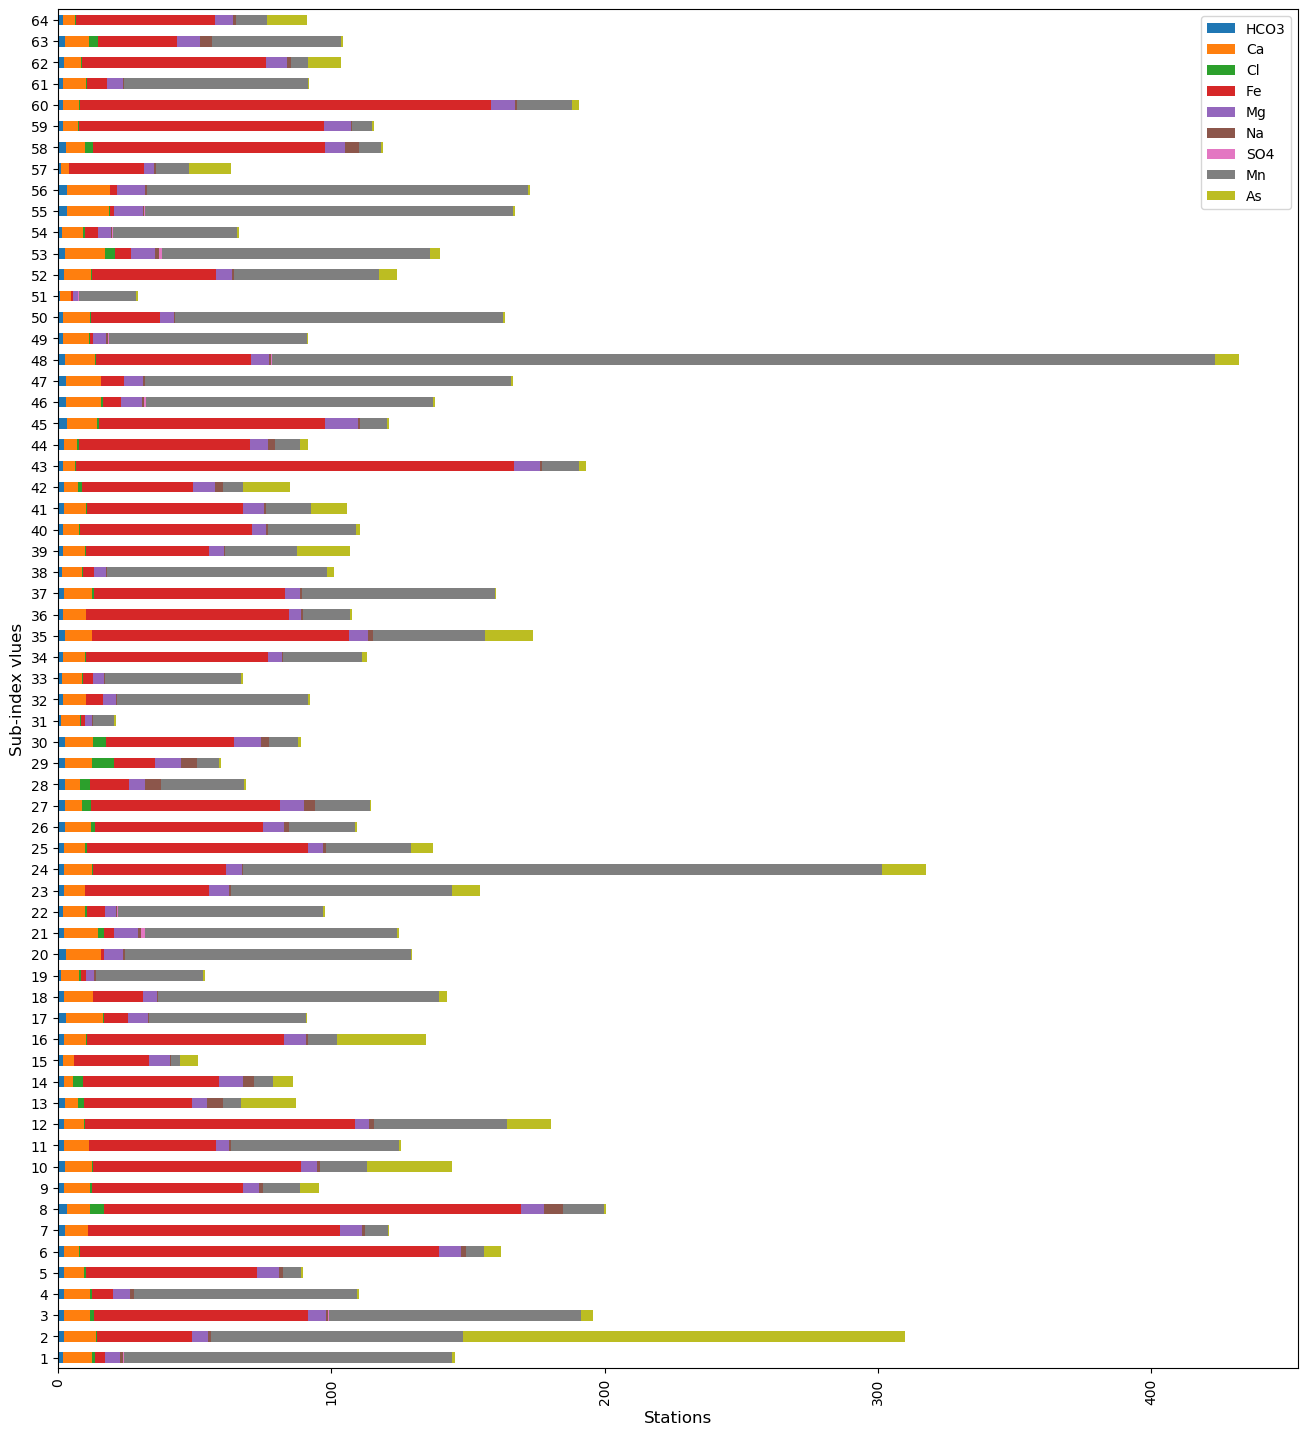

In [13]:
df1.groupby(by = "Station").mean().sort_values(by=['Station'], ascending=True).plot(kind="barh",stacked=True,width=.5,figsize=(16, 18))
plt.xticks(rotation =90)
plt.xlabel('Stations',fontsize = 'large')
plt.ylabel('Sub-index vlues',fontsize = 'large')
plt.legend() 


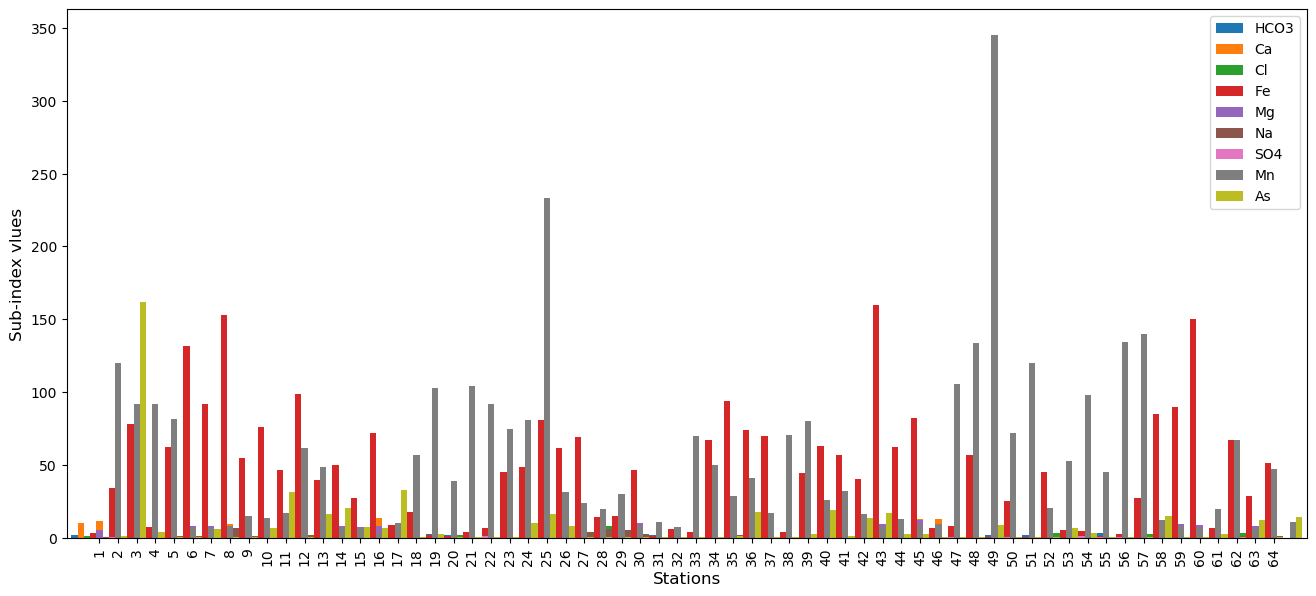

In [7]:
df1.groupby(by = "Station").mean().sort_values(by=['Station'], ascending=True).plot(kind="bar",width=3,figsize=(16, 7))
plt.xticks(rotation =90)
plt.xlabel('Stations',fontsize = 'large')
plt.ylabel('Sub-index vlues',fontsize = 'large')
plt.legend() 

In [20]:
df=pd.read_excel("Only WQI.xlsx",'Sheet2')
df.head(3)

UNION        GWQI
0   Paurashava  155.684524
1   Paurashava  321.950680
2    Ambikapur  206.149320

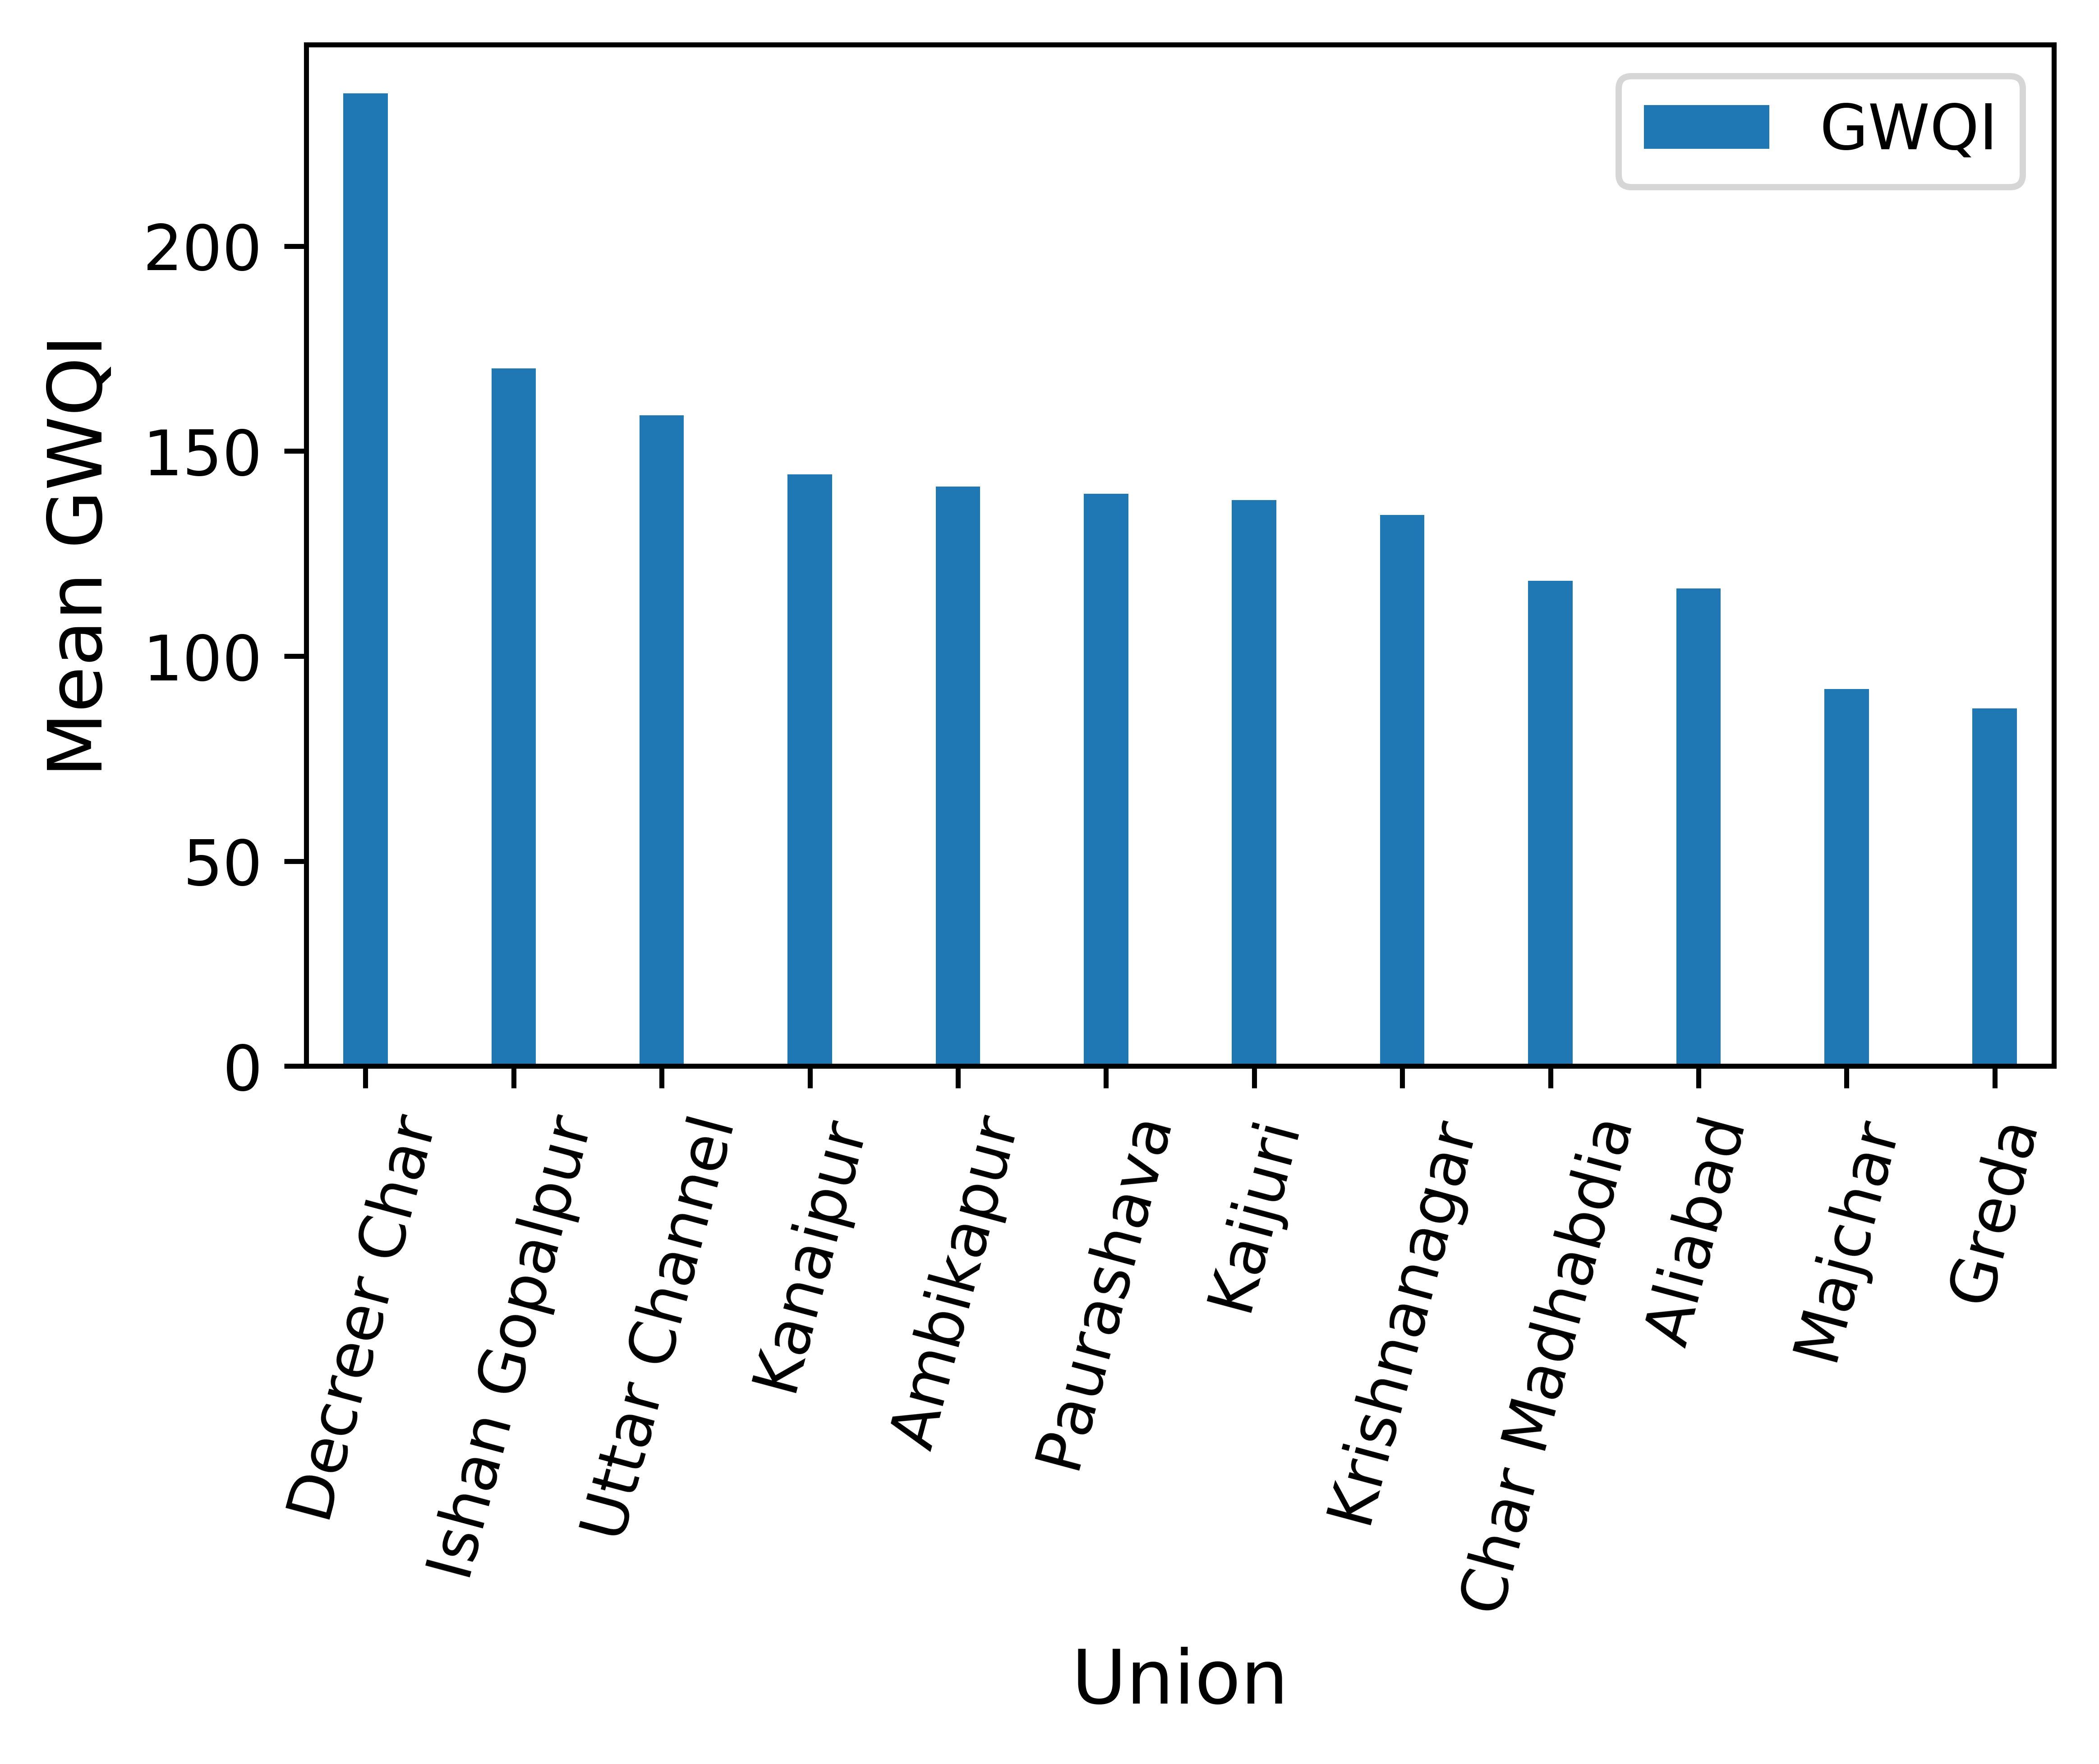

In [21]:
# dff = pd.read_excel("arsenic hazard totaaaal.xlsx",'WwwQI')
df.groupby(by = "UNION").mean().sort_values(by=['GWQI'], ascending=False).plot(kind="bar",width=.3,figsize=(5, 3))
plt.xticks(rotation =75)
plt.xlabel('Union',fontsize = 'large')
plt.ylabel('Mean GWQI',fontsize = 'large')
plt.legend()


In [36]:
x=dff.groupby(by = "UNION").mean().sort_values(by=['GWQI'], ascending=False)
x

GWQI
UNION                     
Decreer Char    237.209184
Ishan Gopalpur  170.134651
Uttar Channel   158.734439
 Paurashava     147.931463
Kanaipur        144.284694
Ambikapur       141.309977
Kaijuri         138.016915
Krishnanagar    134.412217
Char Madhabdia  118.412968
Aliabad         116.511905
Paurashava      114.445408
Majchar          92.009728
Greda            87.275964

In [24]:
dff.groupby(by = "UNION").mean().sort_values(by=['HI for Group1'], ascending=False).plot(kind="bar",width=.5,figsize=(12, 6))
plt.xticks(rotation =75)
plt.xlabel('Union',fontsize = 'large')
plt.ylabel('HI for all age groups ',fontsize = 'large')
plt.legend()

In [64]:
dff.groupby(by = "UNION").mean().sort_values(by=['HI for Group1'], ascending=False)

HI for Group1  HI for group2  HI  for group3
UNION                                                       
 Paurashava         39.568872      41.727175       16.392819
Kanaipur            20.466601      21.582961        8.479020
Aliabad             14.235398      15.011874        5.897522
Ishan Gopalpur      13.381043      14.110918        5.543575
Paurashava           9.709113      10.238701        4.022347
Kaijuri              9.057774       9.551835        3.752507
Greda                8.571155       9.038672        3.550907
Krishnanagar         7.526913       7.937472        3.118293
Decreer Char         5.051494       5.327030        2.092762
Ambikapur            4.534319       4.781645        1.878503
Majchar              2.155639       2.273219        0.893050
Uttar Channel        1.657422       1.747827        0.686646
Char Madhabdia       1.504368       1.586424        0.623238

<IPython.core.display.Javascript object>


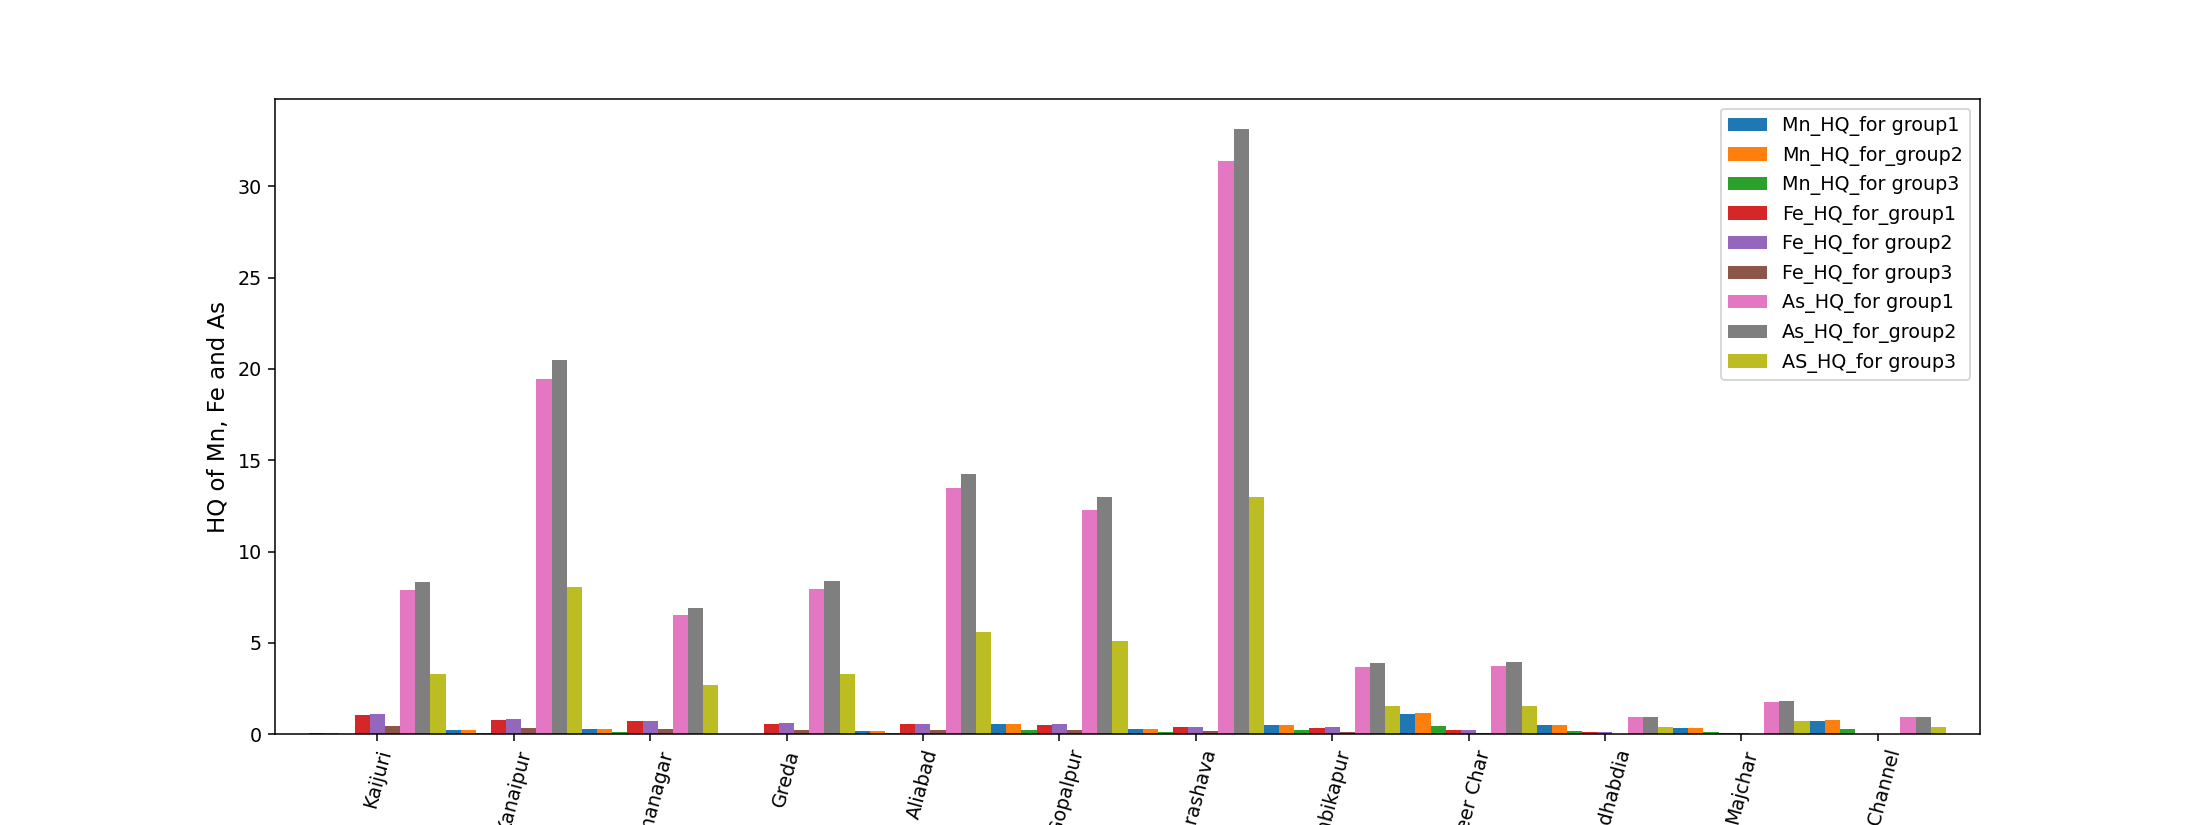

In [11]:

df.groupby(by = "UNION").mean().sort_values(by=['Fe_HQ_for_group1'], ascending=False).plot(kind="bar",width=1,figsize=(16, 6))
plt.xticks(rotation =75)
plt.xlabel('Union',fontsize = 'large')
plt.ylabel('HQ of Mn, Fe and As',fontsize = 'large')
plt.legend()

In [9]:
x=df.groupby(by = "UNION").mean().sort_values(by=['Fe_HQ_for_group1'], ascending=False)
x

Mn_HQ_for group1  mn_HQ_for_group2  Mn_HQ_for group3  \
UNION                                                                  
Kaijuri                 0.080258          0.084635          0.033250   
Kanaipur                0.223842          0.236052          0.092735   
Krishnanagar            0.262233          0.276537          0.108639   
Paurashava              0.162315          0.171169          0.067245   
Greda                   0.038259          0.040346          0.015850   
Aliabad                 0.181070          0.190946          0.075015   
Ishan Gopalpur          0.553325          0.583506          0.229235   
Ambikapur               0.497865          0.525022          0.206259   
 Paurashava             0.339080          0.357576          0.140476   
Decreer Char            1.092365          1.151948          0.452551   
Char Madhabdia          0.487931          0.514545          0.202143   
Majchar                 0.347291          0.366234          0.143878   
Uttar Channel           0.721675          0.761039          0.298980   

                Fe_HQ_for_group1  Fe_HQ_for group2  Fe_HQ_for group3  \
UNION                                                                  
Kaijuri                 1.055324          1.112887          0.437206   
Kanaipur                0.794483          0.837818          0.329143   
Krishnanagar            0.712956          0.751844          0.295367   
Paurashava              0.581281          0.612987          0.240816   
Greda                   0.563547          0.594286          0.233469   
Aliabad                 0.556791          0.587161          0.230671   
Ishan Gopalpur          0.528867          0.557714          0.219102   
Ambikapur               0.358292          0.377835          0.148435   
 Paurashava             0.340903          0.359498          0.141231   
Decreer Char            0.223498          0.235688          0.092592   
Char Madhabdia          0.096897          0.102182          0.040143   
Majchar                 0.061222          0.064561          0.025363   
Uttar Channel           0.016207          0.017091          0.006714   

                As_HQ_for group1  As_HQ_for_group2  AS_HQ_for group3  
UNION                                                                 
Kaijuri                 7.922193          8.354312          3.282051  
Kanaipur               19.448276         20.509091          8.057143  
Krishnanagar            6.551724          6.909091          2.714286  
Paurashava              8.965517          9.454545          3.714286  
Greda                   7.969349          8.404040          3.301587  
Aliabad                13.497537         14.233766          5.591837  
Ishan Gopalpur         12.298851         12.969697          5.095238  
Ambikapur               3.678161          3.878788          1.523810  
 Paurashava            38.888889         41.010101         16.111111  
Decreer Char            3.735632          3.939394          1.547619  
Char Madhabdia          0.919540          0.969697          0.380952  
Majchar                 1.747126          1.842424          0.723810  
Uttar Channel           0.919540          0.969697          0.380952

In [14]:
splitb = df.loc[df['AS_HQ_for group3'] >1] 
print(len(splitb)/64)
# print('------------------')
# print(splitb)

0.4375


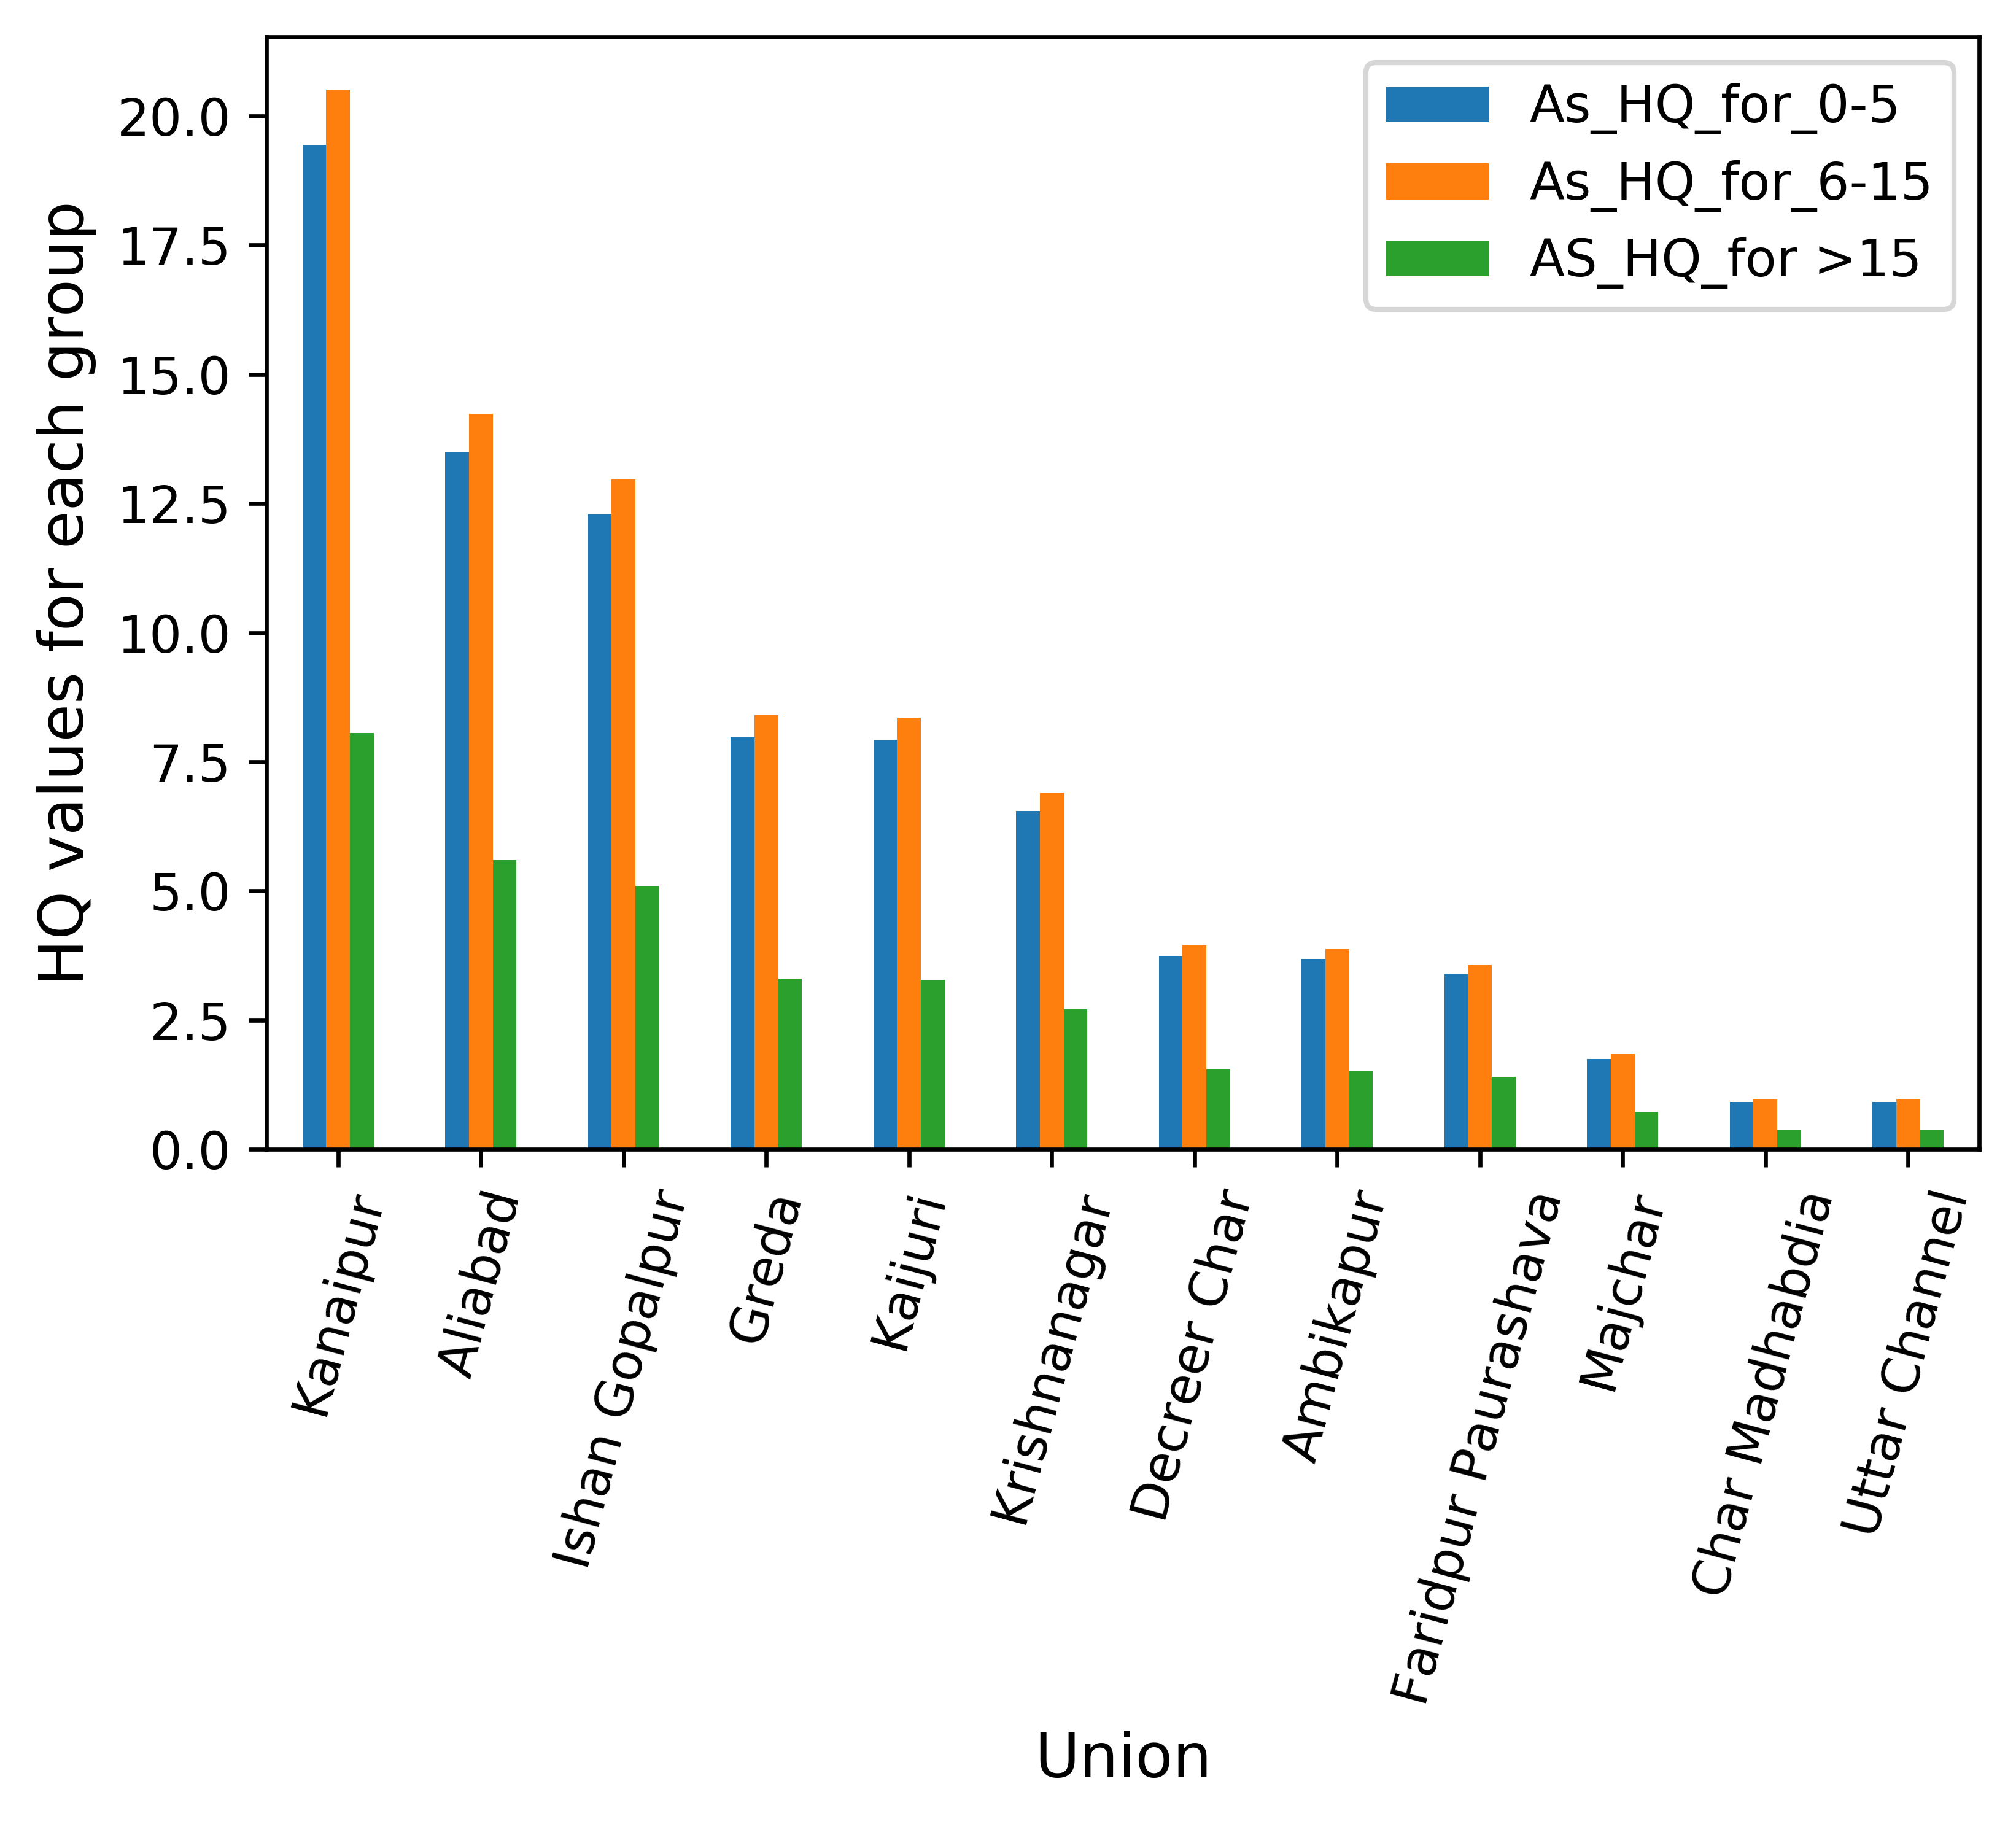

In [3]:
#  df=pd.read_excel("Only WQI.xlsx",'two of them')
df=pd.read_excel("Only WQI.xlsx",'As')
# df.groupby(by = "UNION").mean().sort_values(by=['Fe_HQ_for_group1'], ascending=False).plot(kind="bar",width=.5,figsize=(10,5))
df.groupby(by = "UNION").mean().sort_values(by=['As_HQ_for_0-5'], ascending=False).plot(kind="bar",width=.5)
plt.xticks(rotation =75)
plt.xlabel('Union',fontsize = 'large')
plt.ylabel('HQ values for each group',fontsize = 'large')
plt.legend()

<IPython.core.display.Javascript object>


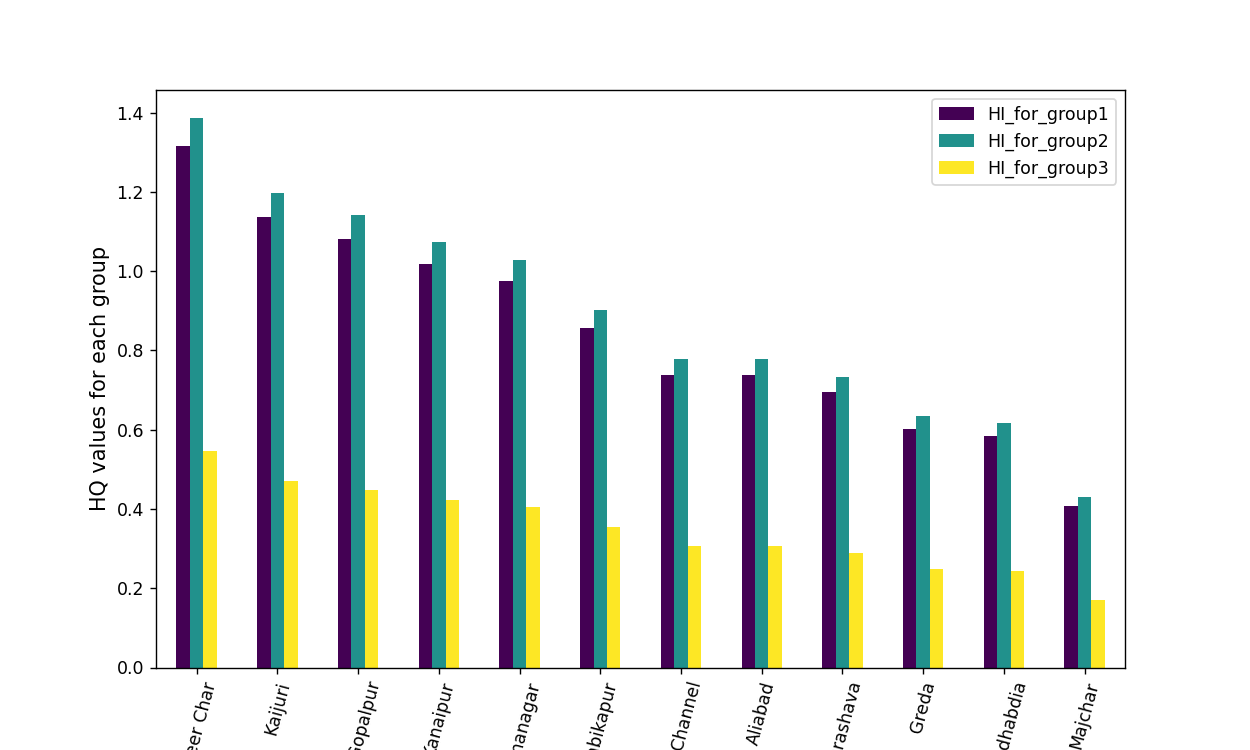

In [4]:
df=pd.read_excel("Only WQI.xlsx",'Sheet4')
df.groupby(by = "UNION").mean().sort_values(by=['HI_for_group3'], ascending=False).plot(kind="bar",width=.5,colormap='viridis',figsize=(10, 6))
plt.xticks(rotation =75)
plt.xlabel('Union',fontsize = 'large')
plt.ylabel('HQ values for each group',fontsize = 'large')
plt.legend()

In [15]:
x=df.groupby(by = "UNION").mean().sort_values(by=['HI_for_group3'], ascending=False)
x

HI_for_group1  HI_for_group2  HI_for_group3
UNION                                                      
Decreer Char         1.315862       1.387636       0.545143
Kaijuri              1.135582       1.197522       0.470455
Ishan Gopalpur       1.082192       1.141221       0.448337
Kanaipur             1.018325       1.073870       0.421878
Krishnanagar         0.975189       1.028381       0.404007
Ambikapur            0.856158       0.902857       0.354694
Paurashava           0.743596       0.784156       0.308061
Uttar Channel        0.737882       0.778130       0.305694
Aliabad              0.737861       0.778108       0.305685
 Paurashava          0.679984       0.717074       0.281707
Greda                0.601806       0.634632       0.249320
Char Madhabdia       0.584828       0.616727       0.242286
Majchar              0.408512       0.430795       0.169241

In [11]:
dff = pd.read_excel("arsenic hazard totaaaal.xlsx",'Sheet5')
y= dff.corr()
y
y.to_excel("correlationnnnn3.xlsx")

<IPython.core.display.Javascript object>


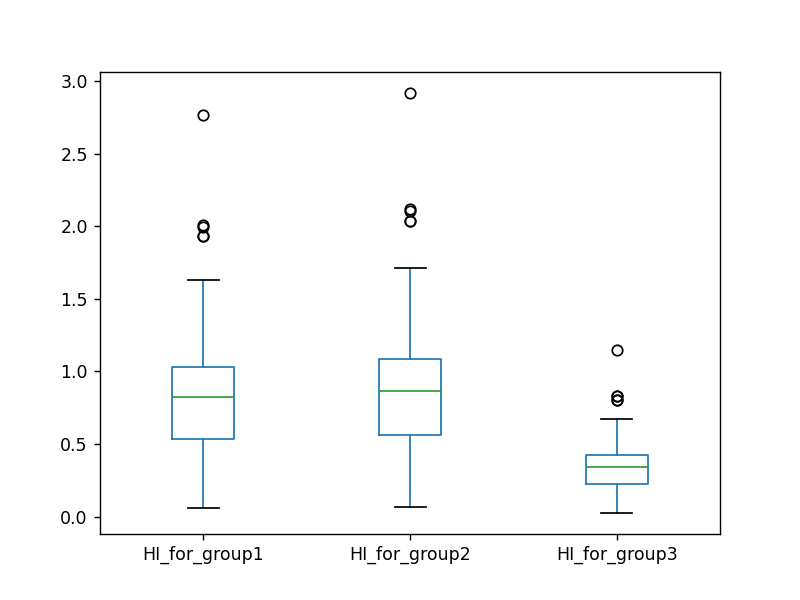

In [6]:
df.plot.box()